In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt






sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline

 

In [2]:
# import sys
# !{sys.executable} -m pip install ipysankeywidget
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))


In [3]:
sc.settings.figdir = "sfig5"


# Load adata

In [4]:
""""
can ski plots of intermediatry steps below by using

adata_all = sc.read_h5ad('/nfs/team298/ls34/disease_atlas/data2/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30.h5ad.updated',)

"""

'"\ncan ski plots of intermediatry steps below by using\n\nadata_all = sc.read_h5ad(\'/nfs/team298/ls34/disease_atlas/data2/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30.h5ad.updated\',)\n\n'

In [5]:
adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated10.lesionalonly')


# Marker genes

In [6]:
adata.X[:6,:6].A

array([[0.        , 0.        , 0.1830545 , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.26011536, 0.        , 0.        ,
        0.        ],
       [0.27852675, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.51057242, 0.        , 0.        ,
        0.        ],
       [0.58557305, 0.        , 0.33504976, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.3427957 , 0.        , 0.        ,
        0.        ]])

In [7]:
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
# adata

In [8]:
# adata.obs["combined"] = adata.obs["test13"].astype(str) + "_" + adata.obs["Site_status_binary"].astype(str)

In [9]:
adata.obs['corefb_names2']=adata.obs['test13']

In [10]:
adata.obs.corefb_names2.value_counts()

corefb_names2
F8: Fascia-like myofibroblast     38290
F1: Superficial                   36949
F7: Myofibroblast                 25474
F3: FRC-like                      23147
F2: Universal                     17949
F2/3: Perivascular                14900
F4: DS_DPEP1+                     11182
F6: Inflammatory myofibroblast     6157
F5: NGFR+                          5987
F5: RAMP1+                         4554
F4: TNN+COCH+                      3466
F_Fascia                           1764
F4: DP_HHIP+                        937
Name: count, dtype: int64

In [11]:

sc.tl.rank_genes_groups(adata, 'corefb_names2', method='t-test', key_added="rank_genes_groups");
df2 = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
df2.head(1)


,F1: Superficial,F2: Universal,F2/3: Perivascular,F3: FRC-like,F4: DS_DPEP1+,F4: TNN+COCH+,F4: DP_HHIP+,F5: RAMP1+,F5: NGFR+,F6: Inflammatory myofibroblast,F7: Myofibroblast,F8: Fascia-like myofibroblast,F_Fascia
0,APCDD1,DCN,CFD,APOE,RPS4X,COCH,INHBA,APOD,APOD,INHBA,COL1A1,POSTN,COMP


In [12]:
# adata = adata[adata.obs["combined"].str.startswith("F1")]

# GSEA

In [14]:
# result = adata.uns['rank_genes_groups']
# groups = result['names'].dtype.names
# marker_genes = pd.DataFrame({group: result['names'][group] for group in groups})

# print(marker_genes.head())

# for cluster in marker_genes.columns:
#     gene_list = marker_genes[cluster].tolist()
#     enr = gp.enrichr(gene_list=gene_list[:500],
#                      #description=f'Cluster_{cluster}',
#                      gene_sets='GO_Biological_Process_2023',  #'GO_Biological_Process_2021' # You can choose other gene sets here
#                      outdir='GSEA_plots',  # Directory to save results
#                      cutoff=0.05  # Cutoff for statistical significance
#                     )
#     print(enr.results.head())


In [15]:
# adata_core = adata[adata.obs["combined"].str.startswith("F1")]


In [16]:
# adata_core.obs.combined.value_counts()

In [17]:

result = adata.uns['rank_genes_groups']
result

{'params': {'groupby': 'corefb_names2',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('APCDD1', 'DCN', 'CFD', 'APOE', 'RPS4X', 'COCH', 'INHBA', 'APOD', 'APOD', 'INHBA', 'COL1A1', 'POSTN', 'COMP'),
            ('COL18A1', 'CFD', 'APOD', 'CXCL12', 'GPC3', 'TCF4', 'TRPS1', 'GSN', 'IGFBP7', 'COL4A1', 'COL1A2', 'FN1', 'THBS4'),
            ('TWIST2', 'FBLN1', 'GSN', 'IGFBP7', 'RPL10', 'TNN', 'CPE', 'TIMP3', 'RPS4X', 'HLA-B', 'COL3A1', 'COL1A1', 'SFRP4'),
            ...,
            ('SFRP4', 'TAGLN', 'COMP', 'C1QTNF3', 'PDLIM3', 'PLA2G2A', 'ANGPTL1', 'C1QTNF3', 'CTHRC1', 'C1QTNF3', 'SOD3', 'CFD', 'TMEM176B'),
            ('ASPN', 'FABP5', 'TNC', 'SPON2', 'TGFBI', 'SFRP2', 'SFRP4', 'POSTN', 'COMP', 'CFD', 'CD9', 'SELENOP', 'APOE'),
            ('MGP', 'SPARCL1', 'POSTN', 'ASPN', 'SFRP4', 'MGP', 'CCN5', 'CTHRC1', 'POSTN', 'ADH1B', 'APOD', 'SOD3', 'PTGDS')],
           dtype=[('F1: Superficial', 

In [18]:

groups = list(df2.columns)
marker_genes = pd.DataFrame({group: result['names'][group] for group in groups})
marker_genes
#groups = ['F1: Superficial_Lesional',
# 'F1: Superficial_Nonlesional',]
groups = [x for x in groups if any(x.startswith(prefix) for prefix in ["F6", "F7", "F8", "F1", "F3"])]
groups

['F1: Superficial',
 'F3: FRC-like',
 'F6: Inflammatory myofibroblast',
 'F7: Myofibroblast',
 'F8: Fascia-like myofibroblast']

In [19]:
# import time
# t1 = time.time()
# # NOTE: To speed up, use gp.prerank instead with your own ranked list.
# res = gp.gsea(data=adata.to_df().T, # row -> genes, column-> samples
#         gene_sets="GO_Biological_Process_2023",
#         cls=adata.obs.test13,
#         permutation_num=1000,
#         permutation_type='phenotype',
#         outdir=None,
#         method='s2n', # signal_to_noise
#         threads= 8)
# t2=time.time()
# print(t2-t1)

In [20]:

gsea_results = []

for cluster in marker_genes.columns:
    gene_list = marker_genes[cluster].tolist()
    enr = gp.enrichr(gene_list=gene_list[:200],
                     gene_sets= 'GO_Biological_Process_2023',  # You can choose other gene sets here
                     outdir=None,  # Set to None to avoid creating output files
                     cutoff=0.01  # Cutoff for statistical significance
                    )
    enr.results['Cluster'] = cluster
    gsea_results.append(enr.results)

gsea_df = pd.concat(gsea_results)
gsea_df.head(5)
"""
Reactome_2019 
'KEGG_2016',
'Reactome_2019',
'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'
"""

# gsea_results = []

# for cluster in marker_genes.columns:
#     gene_list = marker_genes[cluster].tolist()
#     enr = gp.enrichr(gene_list=gene_list[:6000],
#                      gene_sets=  # You can choose other gene sets here
#                      outdir=None,  # Set to None to avoid creating output files
#                      cutoff=0.05  # Cutoff for statistical significance
#                     )
#     enr.results['Cluster'] = cluster
#     gsea_results.append(enr.results)

# gsea_df = pd.concat(gsea_results)
# gsea_df
# """

# Reactome_2019 
# 'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'
# """



"\nReactome_2019 \n'KEGG_2016',\n'Reactome_2019',\n'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'\n"

In [21]:
gsea_df.head(5)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Cluster
0,GO_Biological_Process_2023,Cytoplasmic Translation (GO:0002181),20/93,1.226713e-13,1.676889e-10,0,0,11.088470,329.652104,RPL41;RPL10;RPL12;RPL22;RPL35A;RPS4X;RPS26;RPL...,F1: Superficial
1,GO_Biological_Process_2023,Negative Regulation Of Apoptotic Process (GO:0...,44/482,1.261768e-13,1.676889e-10,0,0,4.199351,124.725316,DDX3X;RPL10;SHC1;IFI6;HSPB1;PIK3R1;THBS1;AQP1;...,F1: Superficial
2,GO_Biological_Process_2023,Regulation Of Angiogenesis (GO:0045765),24/205,3.747864e-10,3.029128e-07,0,0,5.381587,116.805540,SEMA5A;BTG1;STAT1;WNT5A;TWIST1;HSPB1;TNFAIP3;I...,F1: Superficial
3,GO_Biological_Process_2023,Peptide Biosynthetic Process (GO:0043043),21/158,4.558507e-10,3.029128e-07,0,0,6.196349,133.276373,RPL41;RPL10;RPL12;RPL22;RPL35A;EEF1A1;RPS26;RP...,F1: Superficial
4,GO_Biological_Process_2023,Negative Regulation Of Programmed Cell Death (...,33/381,6.325769e-10,3.362779e-07,0,0,3.888946,82.372625,DDX3X;RPL10;SHC1;IFI6;HSPB1;PIK3R1;THBS1;AQP1;...,F1: Superficial


In [22]:

gsea_df = gsea_df[gsea_df["Cluster"].isin(groups)]
gsea_df['Cluster'].value_counts()

Cluster
F1: Superficial                   2658
F6: Inflammatory myofibroblast    2653
F3: FRC-like                      2628
F8: Fascia-like myofibroblast     2330
F7: Myofibroblast                 2007
Name: count, dtype: int64

/tmp/ipykernel_19725/2880934558.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, PLOTTING_VALUE)).reset_index(drop=True)


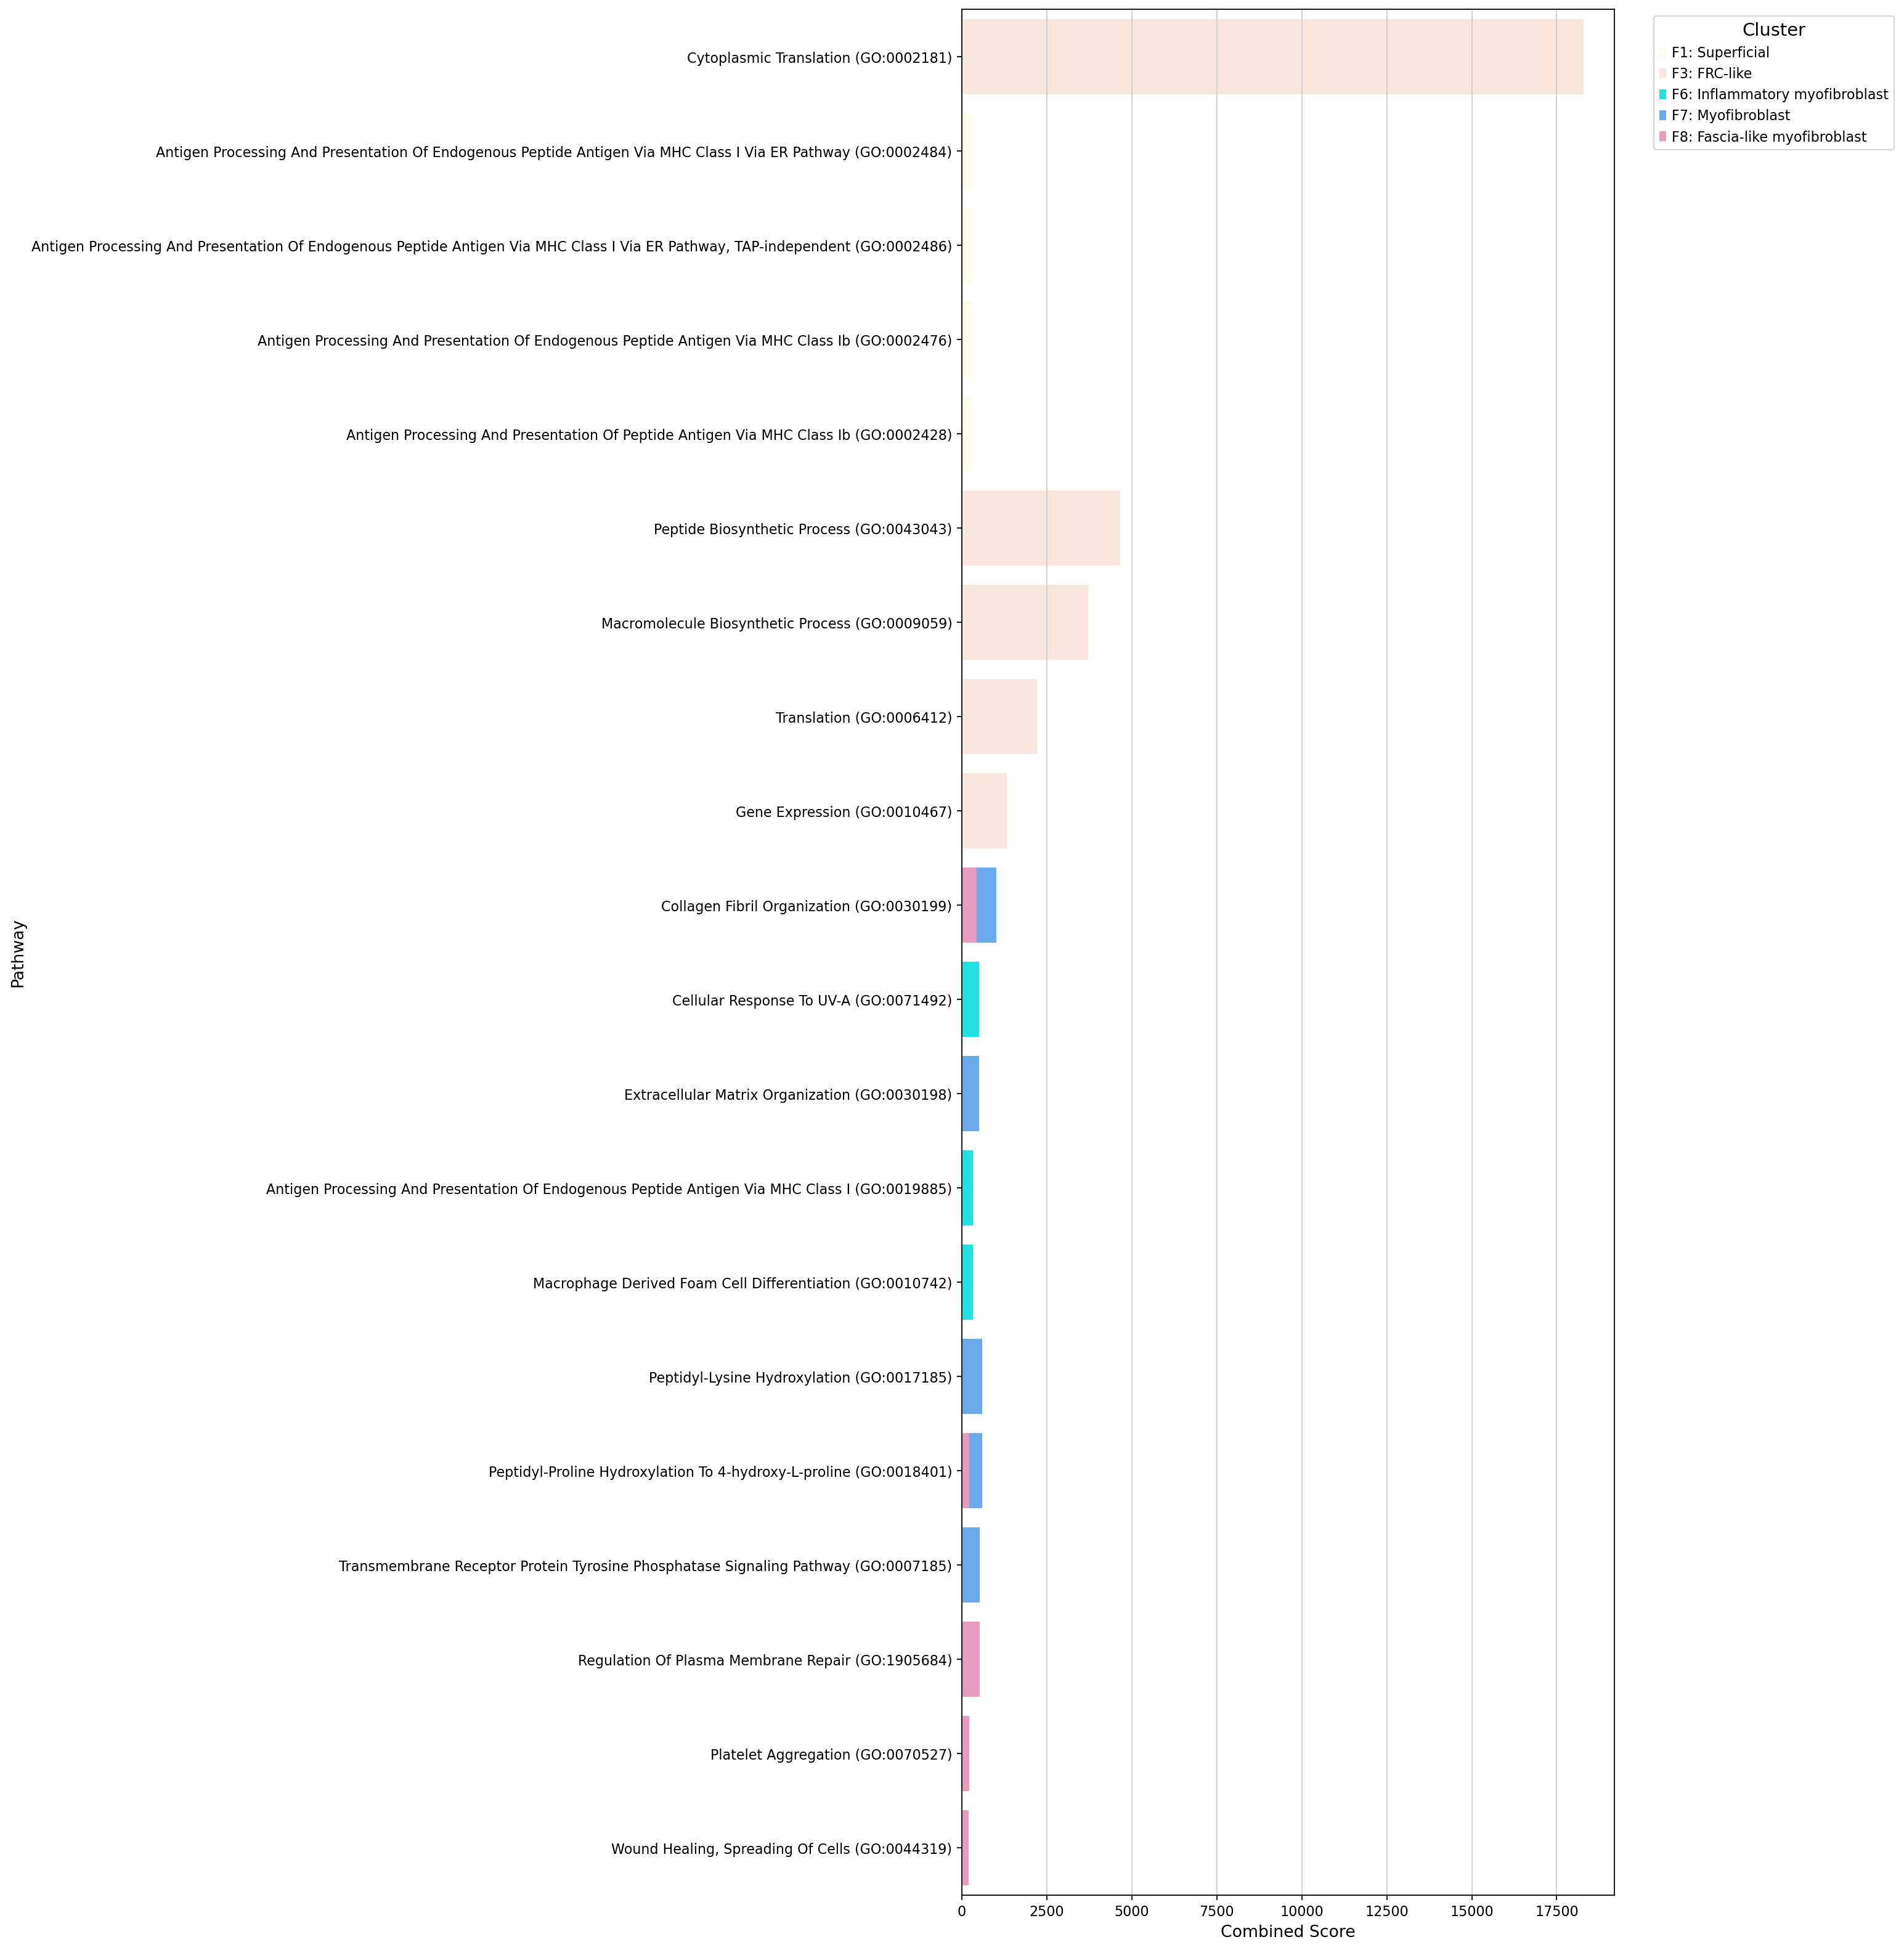

In [26]:

color_palettes = {
  'F1: Superficial' :  '#ffffe5',  # Light Salmon
   'F1: Superficial_Lesional': '#fece65',  # Dark Orange
    'F2: Universal': '#d1e2f2',  # Dodger Blue
    'F2/3: Perivascular': '#7fb8da',  # Deep Sky Blue
    'F3: FRC-like':  '#fee5d8',  # Tomato Red

    'F4: DS_DPEP1+':  '#e7f5e5',  # Lime Green
    'F4: TNN+COCH+':  '#80ca80',  # Medium Sea Green
    'F4: DP_HHIP+': '#51a46b',  # Sea Green

    'F5: RAMP1+':  '#9e9ac8',  # Medium Purple
    'F5: NGFR+':  '#796eb2',  # Steel Blue
    'F6: Inflammatory myofibroblast': '#05ffff',  # Steel Blue
    'F6: Myofibroblast':  '#55aaff',  # Steel Blue
    'F7: Myofibroblast':  '#55aaff',  # Steel Blue

    'F7: Fascia-like myofibroblast':  '#f48ebe',  # Dark Red
        'F8: Fascia-like myofibroblast':  '#f48ebe',  # Dark Red

    'F_Fascia':  '#454545',  # Gray
}


PLOTTING_VALUE = 'Combined Score' #'Adjusted P-value' #'Combined Score'


top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, PLOTTING_VALUE)).reset_index(drop=True)


top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])


cluster_colors = top_gsea_df['Cluster'].map(color_palettes)


plt.figure(figsize=(20, 20))
sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)
plt.title('', fontsize=14)
plt.xlabel(PLOTTING_VALUE, fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')
plt.tight_layout()
plt.show()

/tmp/ipykernel_19725/677094032.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(15, PLOTTING_VALUE)).reset_index(drop=True)


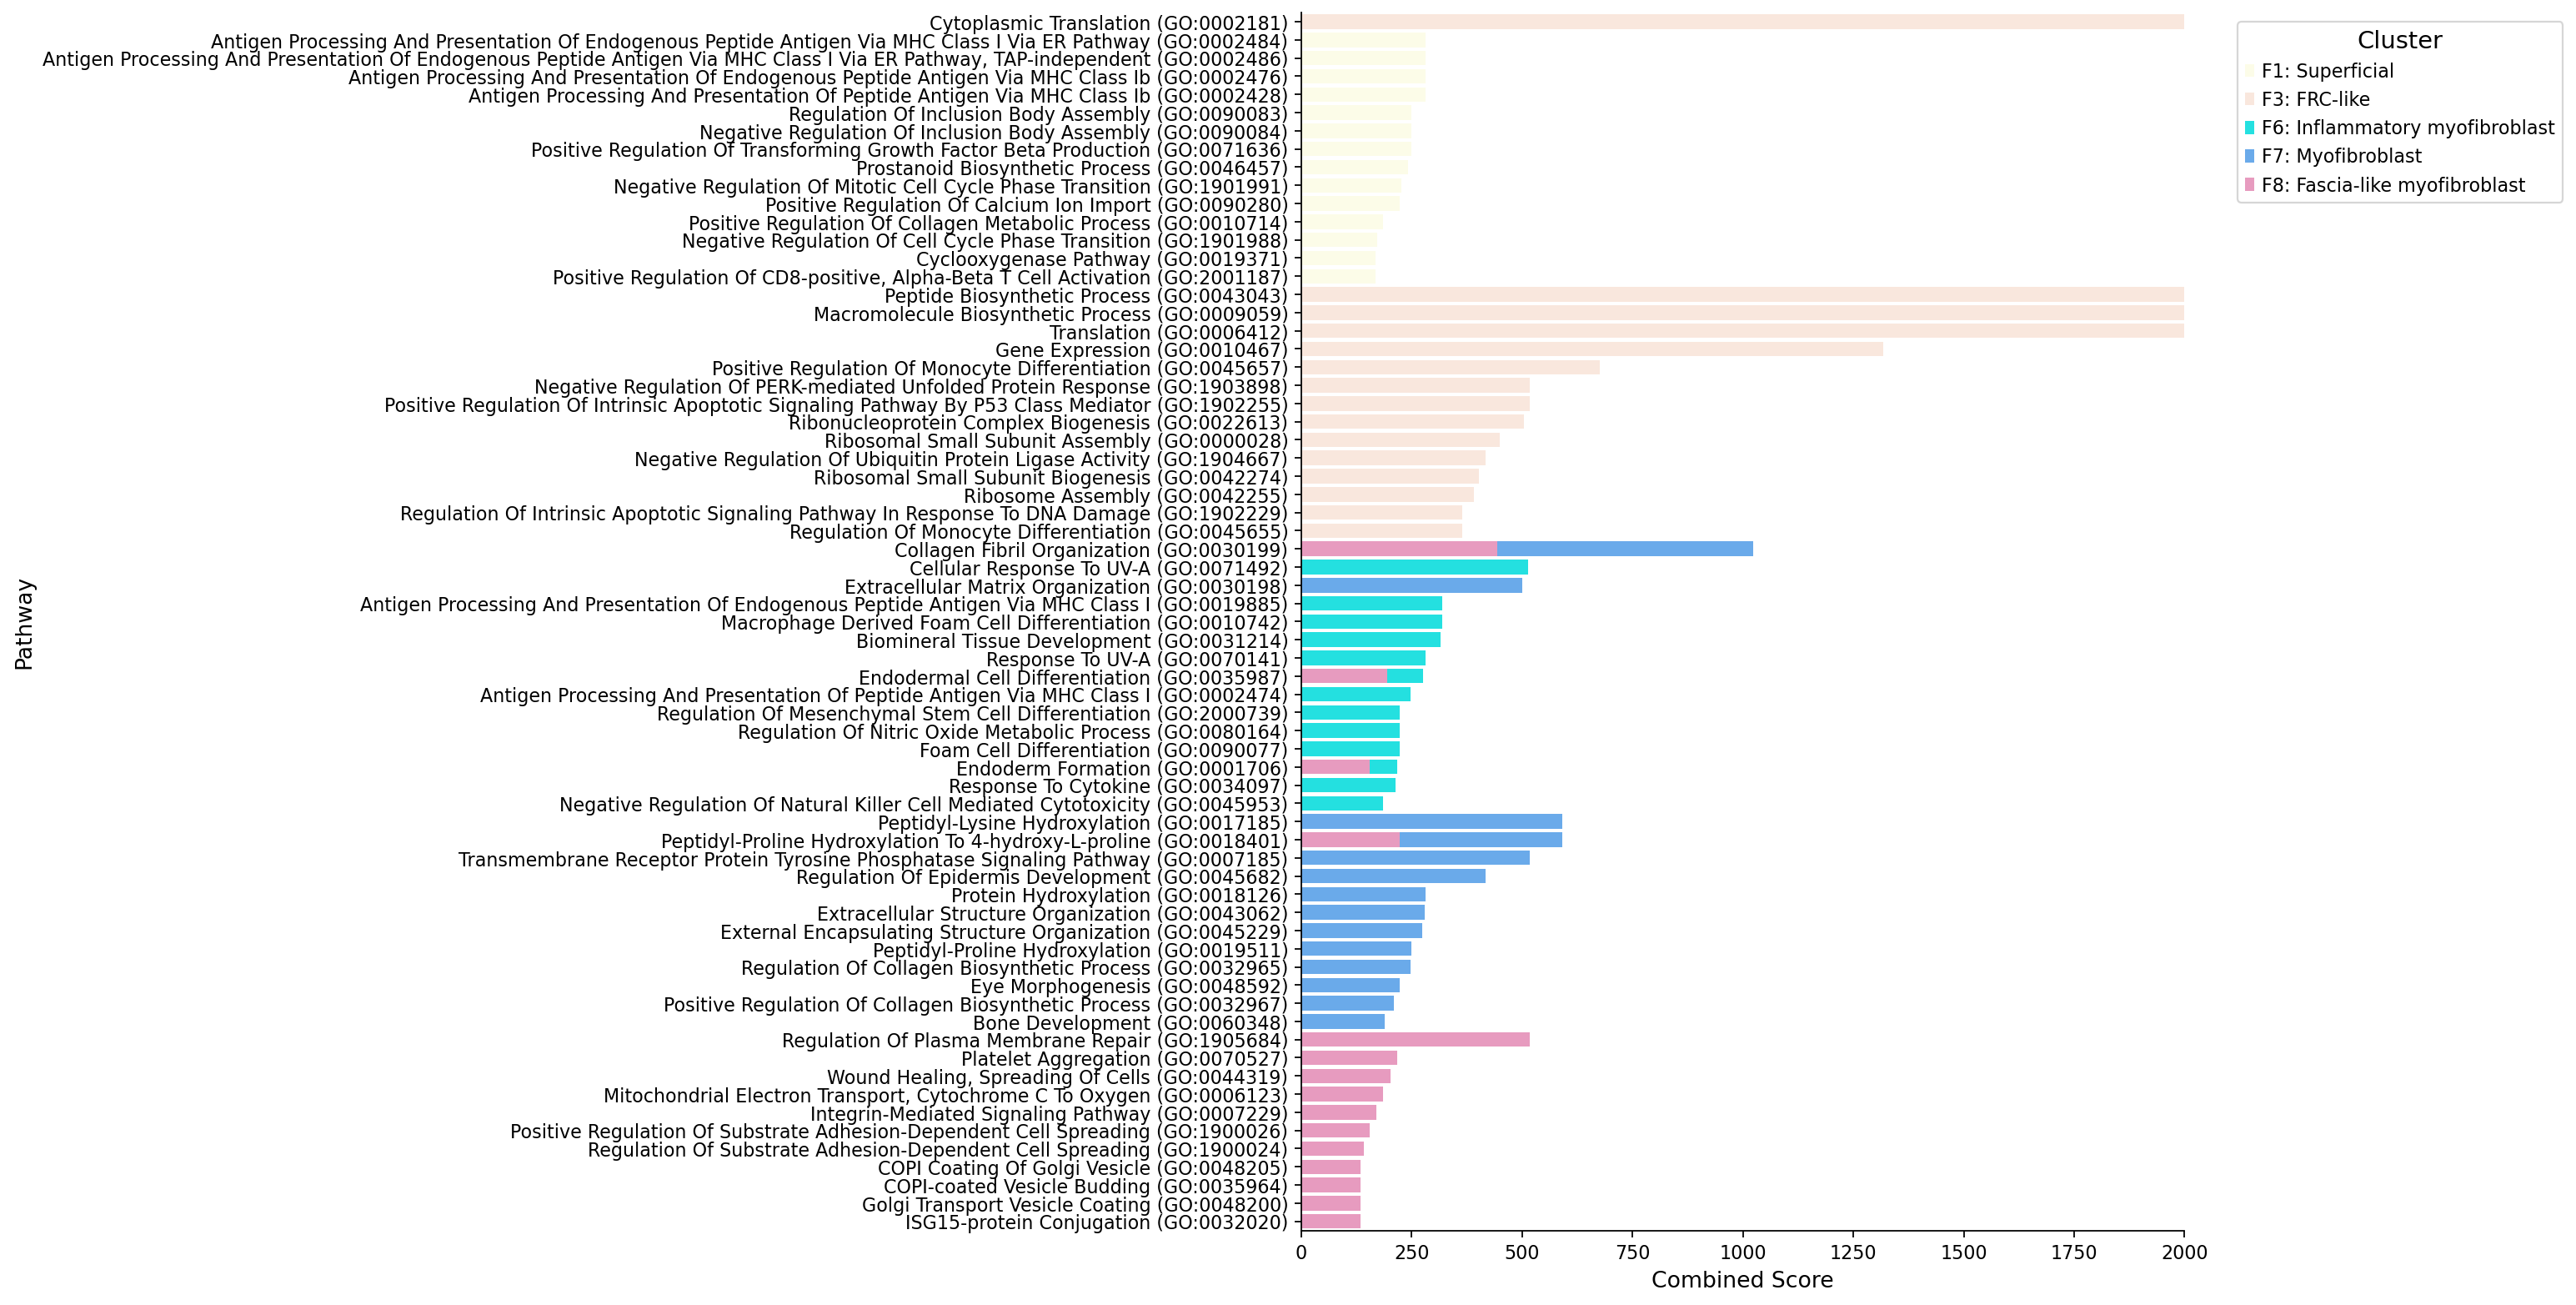

In [27]:


PLOTTING_VALUE = 'Combined Score' #'Adjusted P-value' #'Combined Score'


top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(15, PLOTTING_VALUE)).reset_index(drop=True)


top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])


cluster_colors = top_gsea_df['Cluster'].map(color_palettes)

plt.figure(figsize=(20, 10))
sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)

plt.title('', fontsize=14)
plt.xlabel(PLOTTING_VALUE, fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(right=2000)  


# Remove the top and right border
sns.despine(top=True, right=True)

# Remove background grid
plt.grid(False)

# Adjust legend
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')

plt.tight_layout()
plt.show()

/tmp/ipykernel_19725/18918402.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(10, PLOTTING_VALUE)).reset_index(drop=True)
/tmp/ipykernel_19725/18918402.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


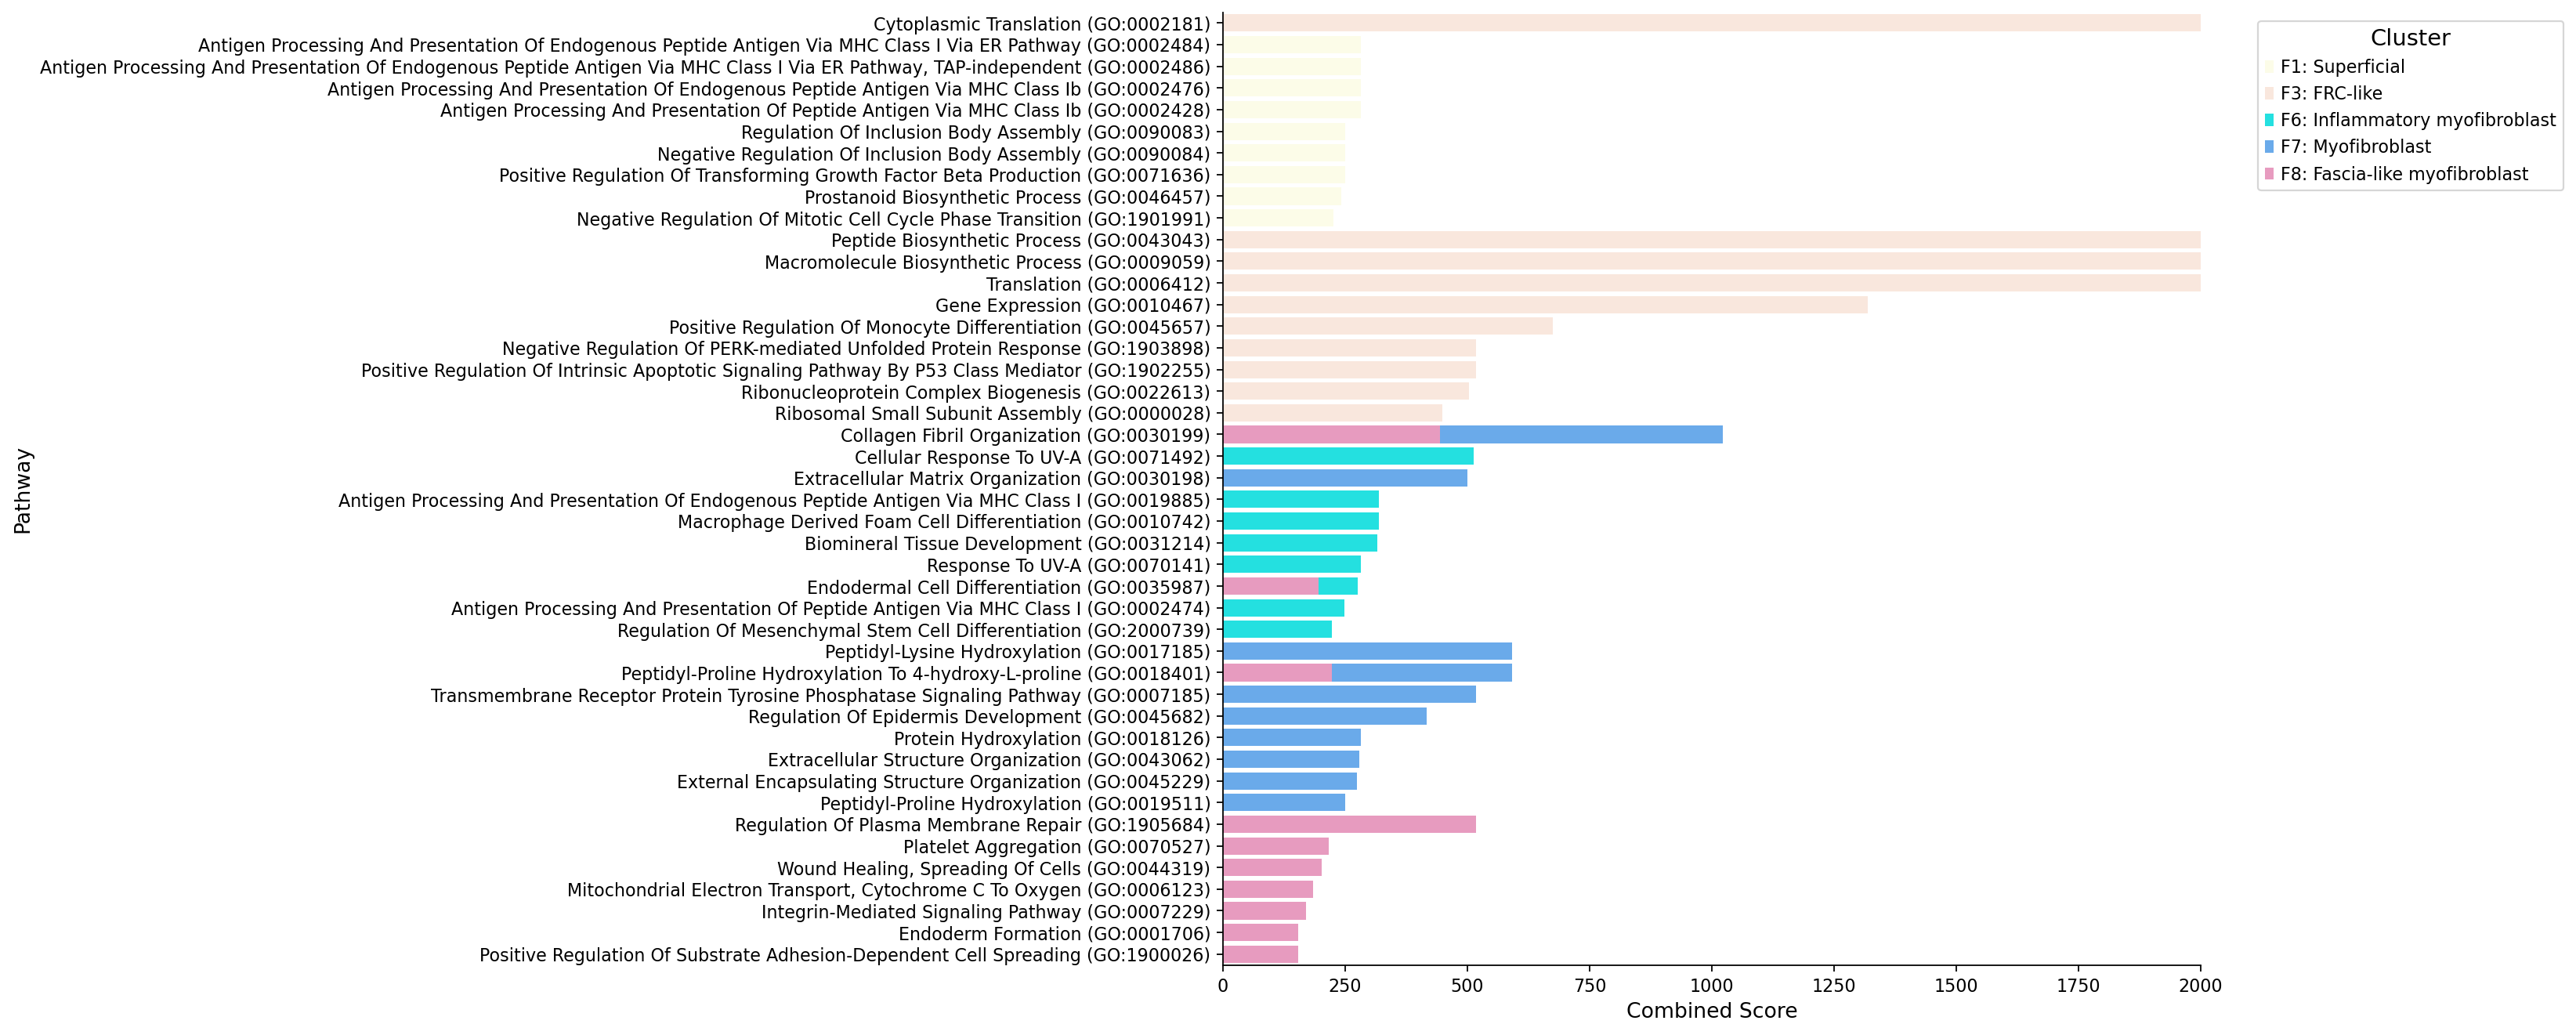

In [28]:
# color_palettes = {
#   'F1: Superficial' :  '#ffffe5',  # Light Salmon
#    'F1: Superficial_Lesional': '#fece65',  # Dark Orange
#     'F2: Universal': '#d1e2f2',  # Dodger Blue
#     'F2/3: Stroma_PPARG+': '#7fb8da',  # Deep Sky Blue
#     'F3: FRC-like':  '#fee5d8',  # Tomato Red

#     'F4: DS_DPEP1+':  '#e7f5e5',  # Lime Green
#     'F4: TNN+COCH+':  '#80ca80',  # Medium Sea Green
#     'F4: DP_HHIP+': '#51a46b',  # Sea Green

#     'F5: RAMP1+':  '#9e9ac8',  # Medium Purple
#     'F5: NGFR+':  '#796eb2',  # Steel Blue
#     'F6: Inflammatory myofibroblast': '#05ffff',  # Steel Blue
#     'F6: Myofibroblast':  '#55aaff',  # Steel Blue
#     'F7: Myofibroblast':  '#55aaff',  # Steel Blue

#     'F7: Fascia-like myofibroblast':  '#f48ebe',  # Dark Red
#         'F7: Fascia-like myofibroblast':  '#f48ebe',  # Dark Red

#     'F_Fascia':  '#454545',  # Gray
# }


PLOTTING_VALUE = 'Combined Score' #'Adjusted P-value' #'Combined Score'


top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(10, PLOTTING_VALUE)).reset_index(drop=True)


top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])


cluster_colors = top_gsea_df['Cluster'].map(color_palettes)

plt.figure(figsize=(10, 10))
sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)

plt.title('', fontsize=14)
plt.xlabel(PLOTTING_VALUE, fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(right=2000)  


# Remove the top and right border
sns.despine(top=True, right=True)

# Remove background grid
plt.grid(False)

# Adjust legend
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')

plt.tight_layout()
plt.show()

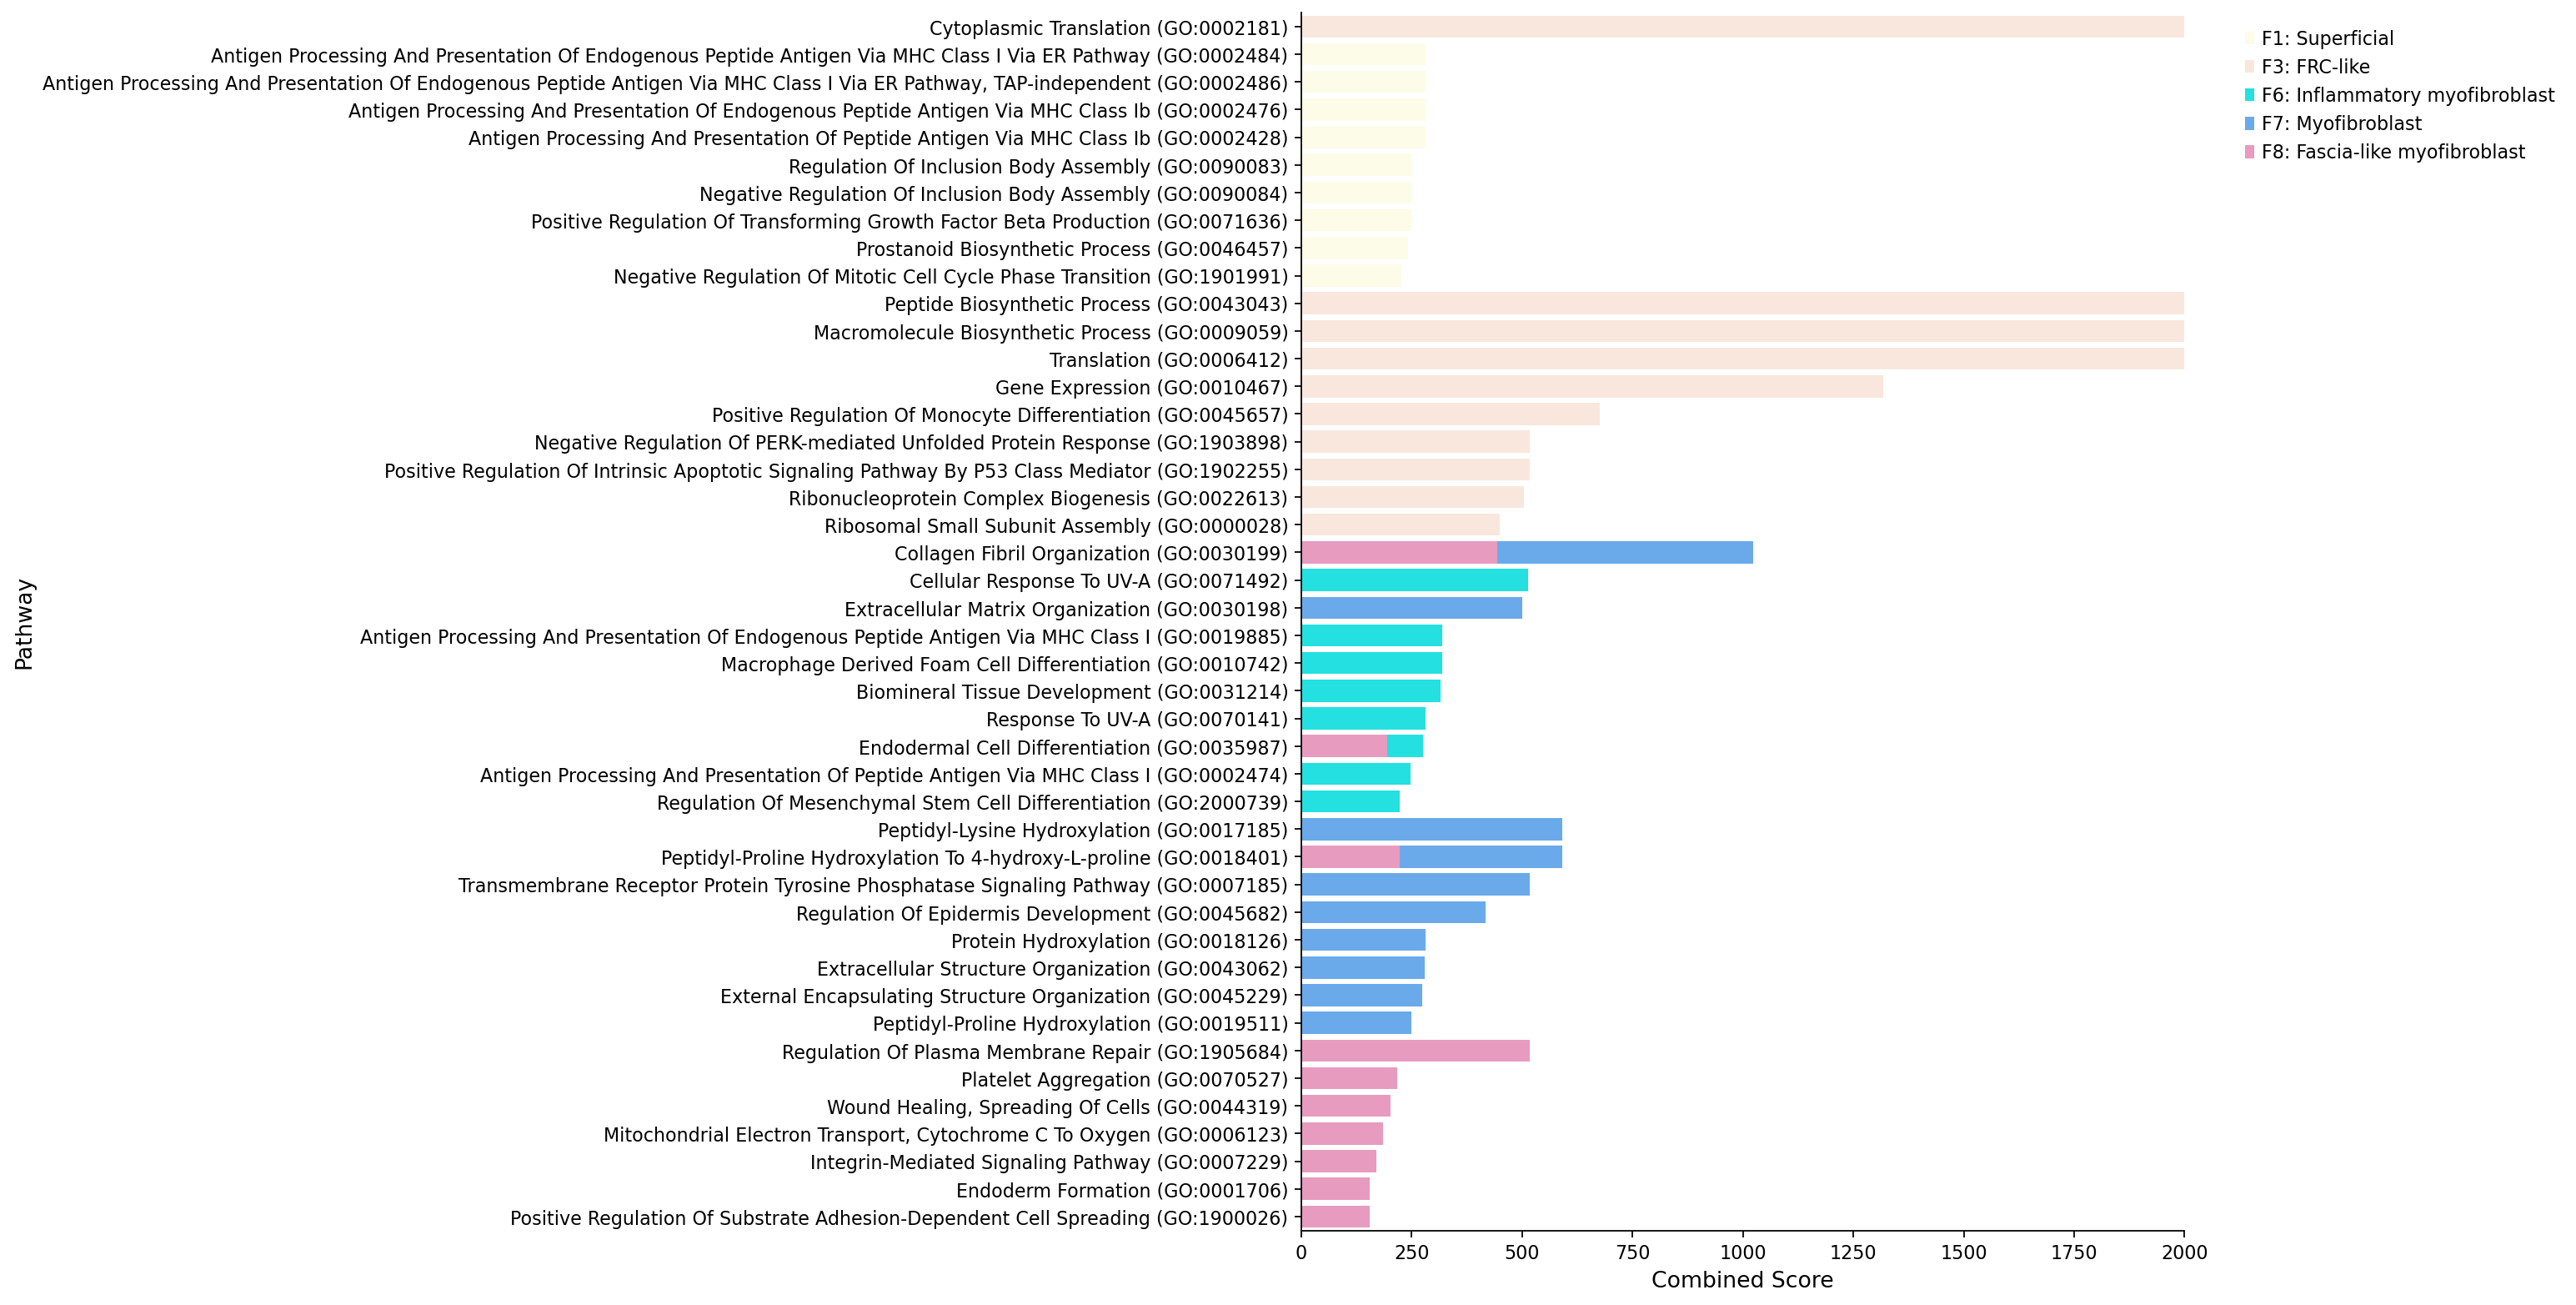

In [29]:











plt.figure(figsize=(20, 10))
sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)

plt.title('', fontsize=14)
plt.xlabel(PLOTTING_VALUE, fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(right=2000)  

# Remove the top and right border
sns.despine(top=True, right=True)

# Remove background grid
plt.grid(False)

# Adjust legend
plt.legend(
    bbox_to_anchor=(1.05, 1), loc='upper left',
    fontsize=10, title=None, frameon=False  # <- Removes title and box
)

plt.tight_layout()

# Save as "sfig5/gsea_disease.pdf"
plt.savefig("sfig5/gsea_disease.pdf", dpi=300, bbox_inches="tight", format="pdf")

plt.show()

In [ ]:
stop

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define color palettes
# color_palettes = {
#     'F1: Superficial': '#ffffe5',
#     'F1: Superficial_Lesional': '#fece65',
#     'F2: Universal': '#d1e2f2',
#     'F2/3: Stroma_PPARG+': '#7fb8da',
#     'F3: FRC-like': '#fee5d8',
#     'F4: DS_DPEP1+': '#e7f5e5',
#     'F4: TNN+COCH+': '#80ca80',
#     'F4: DP_HHIP+': '#51a46b',
#     'F5: RAMP1+': '#9e9ac8',
#     'F5: NGFR+': '#796eb2',
#     'F6: Inflammatory myofibroblast': '#05ffff',
#     'F6: Myofibroblast': '#55aaff',
#     'F7: Myofibroblast fascia-like': '#f48ebe',
#     'F_Fascia': '#454545'
# }

# Ensure column exists
print(gsea_df.columns)  # Check column names
if "Adjusted P-value" not in gsea_df.columns:
    raise ValueError("Column 'Adjusted P-value' not found in DataFrame!")

# Convert to numeric & drop NaNs
PLOTTING_VALUE = 'Adjusted P-value'
gsea_df[PLOTTING_VALUE] = pd.to_numeric(gsea_df[PLOTTING_VALUE], errors="coerce")
gsea_df.dropna(subset=[PLOTTING_VALUE], inplace=True)

# 🔹 **Filter for significance (p < 0.05)**
SIGNIFICANCE_THRESHOLD = 0.05
gsea_df = gsea_df[gsea_df[PLOTTING_VALUE] < SIGNIFICANCE_THRESHOLD]

# Select top 15 terms per cluster (smallest p-values first)
top_gsea_df = gsea_df.groupby('Cluster').apply(
    lambda x: x.nsmallest(15, PLOTTING_VALUE)  # Change `nlargest` to `nsmallest`
).reset_index(drop=True)

# Sort by Cluster and **Adjusted P-value (ascending)**
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, True])

# Map clusters to colors
cluster_colors = top_gsea_df['Cluster'].map(color_palettes).fillna("black")

# Plot
plt.figure(figsize=(20, 20))
sns.barplot(x=PLOTTING_VALUE, y='Term', hue=top_gsea_df["Cluster"], 
            data=top_gsea_df, palette=color_palettes, dodge=False)
plt.title('Top 10 Enriched KEGG Pathways per Cluster (p < 0.05)', fontsize=14)
plt.xlabel(PLOTTING_VALUE, fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')
plt.tight_layout()
plt.show()

In [ ]:
PLOTTING_VALUE = 'Adjusted P-value'
gsea_df[PLOTTING_VALUE] = pd.to_numeric(gsea_df[PLOTTING_VALUE], errors="coerce")
gsea_df.dropna(subset=[PLOTTING_VALUE], inplace=True)

# 🔹 **Filter for significance (p < 0.05)**
SIGNIFICANCE_THRESHOLD = 0.05
gsea_df = gsea_df[gsea_df[PLOTTING_VALUE] < SIGNIFICANCE_THRESHOLD]

gsea_df["log_pval"] = -np.log10(gsea_df[PLOTTING_VALUE])

# Select top 15 terms per cluster (smallest p-values first)
top_gsea_df = gsea_df.groupby('Cluster').apply(
    lambda x: x.nsmallest(15, PLOTTING_VALUE)
).reset_index(drop=True)

# Sort by Cluster and Adjusted P-value (ascending)
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, True])

# Map clusters to colors
cluster_colors = top_gsea_df['Cluster'].map(color_palettes).fillna("black")

# Plot
plt.figure(figsize=(20, 20))
sns.barplot(x="log_pval", y='Term', hue=top_gsea_df["Cluster"], 
            data=top_gsea_df, palette=color_palettes, dodge=False)

plt.title('Top 10 Enriched KEGG Pathways per Cluster (p < 0.05)', fontsize=14)
plt.xlabel('-log10(Adjusted P-value)', fontsize=12)  # 🔥 **Updated axis label**
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')

plt.tight_layout()
plt.show()

In [ ]:
# from gseapy import barplot, dotplot

# ax = dotplot(gsea_results,
#               column="Adjusted P-value",
#               x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
#               size=10,
#               top_term=20,
#               figsize=(3,5),
#               title = "KEGG",
#               xticklabels_rot=45, # rotate xtick labels
#               show_ring=True, # set to False to revmove outer ring
#               marker='o',
#              )

In [ ]:
# from gseapy import barplot, dotplot

# ax = dotplot(enr.results,
#               column="Adjusted P-value",
#               x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
#               size=10,
#               top_term=20,
#               figsize=(3,5),
#               title = "KEGG",
#               xticklabels_rot=45, # rotate xtick labels
#               show_ring=True, # set to False to revmove outer ring
#               marker='o',
#              )

In [ ]:
# ax = barplot(enr.results,
#               column="Adjusted P-value",
#               group='Gene_set', # set group, so you could do a multi-sample/library comparsion
#               size=10,
#               top_term=5,
#               figsize=(3,5),
#               #color=['darkred', 'darkblue'] # set colors for group
#               color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
#              )

In [ ]:
#     gene_list = marker_genes[cluster].tolist()
#     enr = gp.enrichr(gene_list=gene_list[:50],
#                      gene_sets='KEGG_2016',  # You can choose other gene sets here
#                      outdir=None,  # Set to None to avoid creating output files
#                      cutoff=0.05  # Cutoff for statistical significance
#                     )
#     enr.results['Cluster'] = cluster
#     gsea_results.append(enr.results)

# gsea_df = pd.concat(gsea_results)
# gsea_df

In [ ]:




top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(4, 'Combined Score')).reset_index(drop=True)


top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])


cluster_colors = top_gsea_df['Cluster'].map(color_palettes)


plt.figure(figsize=(20, 20))
sns.barplot(x='Combined Score', y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)
plt.title('Top 10 Enriched KEGG Pathways per Cluster', fontsize=14)
plt.xlabel('Combined Score', fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming color_palettes is a dictionary where the keys are clusters and values are colors
# Example: color_palettes = {'Cluster1': '#FF6347', 'Cluster2': '#4682B4', ...}

# Select top 10 enriched pathways for each cluster
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(3, 'Combined Score')).reset_index(drop=True)

# Sort the DataFrame so that terms are grouped by cluster
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# Create a list of colors based on the Cluster column, using the color_palettes dictionary
cluster_colors = top_gsea_df['Cluster'].map(color_palettes)

# Plotting
plt.figure(figsize=(20, 20))
sns.barplot(x='Combined Score', y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)
plt.title('Top 10 Enriched KEGG Pathways per Cluster', fontsize=14)
plt.xlabel('Combined Score', fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Desired order of terms
desired_order = ['F1: Superficial_Nonlesional','F1: Superficial_Lesional', ]
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(8, 'Combined Score')).reset_index(drop=True)

# Create a combined label for sorting
top_gsea_df['Combined'] = top_gsea_df['Cluster'] + ': ' + top_gsea_df['Term']

# Convert 'Term' to a categorical type with the desired order
top_gsea_df['Term'] = pd.Categorical(top_gsea_df['Term'], categories=desired_order, ordered=True)

# Sort the DataFrame so that terms are grouped by cluster and follow the desired order
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Term'])

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Combined Score', y='Combined', hue='Cluster', data=top_gsea_df, dodge=False)
plt.title('Top 10 Enriched KEGG Pathways per Cluster', fontsize=14)
plt.xlabel('Combined Score', fontsize=8)
plt.ylabel('Pathway', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize='13')
plt.tight_layout()
plt.show()
 
   # can i havean empty space between the bars of reach cluster so it's easier to read? the above code worked

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Combined Score')).reset_index(drop=True)

# Create a combined label for sorting
top_gsea_df['Combined'] = top_gsea_df['Cluster'] + ': ' + top_gsea_df['Term']

# Convert 'Term' to a categorical type with the desired order
top_gsea_df['Term'] = pd.Categorical(top_gsea_df['Term'], categories=desired_order, ordered=True)

# Sort the DataFrame so that terms are grouped by cluster and follow the desired order
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Term'])

# Insert NaN rows to create gaps between clusters
def insert_gaps(df, cluster_col, gap_size=1):
    unique_clusters = df[cluster_col].unique()
    gap_df = pd.DataFrame(columns=df.columns)
    for cluster in unique_clusters:
        cluster_df = df[df[cluster_col] == cluster]
        gap_df = pd.concat([gap_df, cluster_df])
        gap_df = pd.concat([gap_df, pd.DataFrame([{}] * gap_size, columns=df.columns)])
    return gap_df

top_gsea_df = insert_gaps(top_gsea_df, 'Cluster')

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Combined Score', y='Combined', hue='Cluster', data=top_gsea_df, dodge=False)
plt.title('Top 10 Enriched KEGG Pathways per Cluster', fontsize=14)
plt.xlabel('Combined Score', fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize='13')
plt.tight_layout()
plt.show()


In [ ]:
top_gsea_df["Cluster"]

In [ ]:
list(top_gsea_df['Cluster'].unique())

In [ ]:
top_gsea_df['Cluster']

In [ ]:
#top_gsea_df['Cluster']

In [ ]:
#top_gsea_df['Cluster']= top_gsea_df['Cluster'].fillna("F4: DP")

In [ ]:
top_gsea_df['Cluster'].unique()

In [ ]:
# top_gsea_df[top_gsea_df['Cluster']=="F4"]

In [ ]:
top_gsea_df['Cluster'].unique()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # # Desired order of terms

# # Select top 5 enriched pathways for each cluster
# top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(10, 'Combined Score')).reset_index(drop=True)

# # Convert 'Cluster' to a categorical type with the desired order
# top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# # Sort the DataFrame so that terms are grouped by cluster and follow the desired order
# top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# # Determine the maximum Combined Score for consistent x-axis limits
# max_combined_score = top_gsea_df['Combined Score'].max()

# # Define color palettes for each cluster
# # color_palettes = {
# #     'F1: Secretory papillary': 'Blues',
# #     'F1*: Secretory': 'Greens',
# #     'F1: Secretory palmoplantar': 'Reds',
# #     'F2: Secretory reticular': 'Purples',
# #     'F2: GDF10/MYOC': 'Oranges',
# #     'F2: Bridge': 'Greys',
# #     'F3: CCL19': 'Blues_d',
# #     'F3*: CCL19': 'Greens_d',
# #     'F4: DPEP1/DS': 'Reds_d',
# #     'F4: TNN+COCH+': 'Purples_d',
# #     'F4:  DP': 'Oranges_d',
# #     'F5: RAMP1': 'Greys_d',
# #     'F5: SFRP4+Schwann-like': 'Blues_r',
# # }

# # Plotting each cluster separately with different colors and consistent x-axis limits
# for cluster in desired_order:
#     cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
#     plt.figure(figsize=(10, 4))
#     sns.barplot(x='Combined Score', y='Term', data=cluster_data,  dodge=False) #palette=color_palettes[cluster],
#     plt.title(f'{cluster}', fontsize=8)
#     plt.xlabel('Combined Score', fontsize=8)
#     plt.ylabel('Pathway', fontsize=8)
#     plt.xticks(fontsize=8)
#     plt.yticks(fontsize=8)
#     plt.xlim(0, 2000)  # max_combined_score  Set consistent x-axis limits
#     plt.tight_layout()
#     # Save each plot as a file or display it
#     #plt.savefig(f'top5_kegg_{cluster.replace(" ", "_").replace("/", "_")}.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
#     plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Desired order of terms
# desired_order = [
#     'F1: Secretory papillary',
#     'F1*: Secretory',
#     'F1: Secretory palmoplantar',
#     'F2: Secretory reticular',
#     'F2: GDF10/MYOC',
#     'F2: Bridge',
#     'F3: CCL19',
#     'F3*: CCL19',
#     'F4: DPEP1/DS',
#     'F4: TNN+COCH+',
#     'F4:  DP',
#     'F5: RAMP1',
#     'F5: SFRP4+Schwann-like',
# ]

# # Select top 5 enriched pathways for each cluster
# top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Combined Score')).reset_index(drop=True)

# # Check for NaN values in the 'Cluster' column
# print("NaN values before fill:", top_gsea_df['Cluster'].isna().sum())

# # Fill NaN values in the 'Cluster' column with "F4: DP"
# top_gsea_df['Cluster'] = top_gsea_df['Cluster'].fillna("F4: DP")
# print("NaN values after fill:", top_gsea_df['Cluster'].isna().sum())

# # Convert 'Cluster' to a categorical type with the desired order
# top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# # Sort the DataFrame so that terms are grouped by cluster and follow the desired order
# top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# # Determine the maximum Combined Score for consistent x-axis limits
# max_combined_score = top_gsea_df['Combined Score'].max()

# # Define color palettes for each cluster
# color_palettes = {
#     'F1: Secretory papillary': 'Blues',
#     'F1*: Secretory': 'Greens',
#     'F1: Secretory palmoplantar': 'Reds',
#     'F2: Secretory reticular': 'Purples',
#     'F2: GDF10/MYOC': 'Oranges',
#     'F2: Bridge': 'Greys',
#     'F3: CCL19': 'Blues_d',
#     'F3*: CCL19': 'Greens_d',
#     'F4: DPEP1/DS': 'Reds_d',
#     'F4: TNN+COCH+': 'Purples_d',
#     'F4:  DP': 'Oranges_d',
#     'F5: RAMP1': 'Greys_d',
#     'F5: SFRP4+Schwann-like': 'Blues_r',
# }

# # Plotting each cluster separately with different colors and consistent x-axis limits
# for cluster in desired_order:
#     cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
#     if cluster_data.empty:
#         print(f"No data for cluster: {cluster}")
#         continue  # Skip plotting if there's no data for this cluster

#     # Create a figure and adjust the margins
#     fig, ax = plt.subplots(figsize=(10, 6))
#     sns.barplot(x='Combined Score', y='Term', data=cluster_data, palette=color_palettes.get(cluster, "viridis"), dodge=False)
#     plt.title(f'Top 5 Enriched KEGG Pathways for {cluster}', fontsize=14)
#     plt.xlabel('Combined Score', fontsize=12)
#     plt.ylabel('Pathway', fontsize=12)
#     plt.xticks(fontsize=10)
#     plt.yticks(fontsize=10)

#     # Adjust the layout
#     plt.subplots_adjust(left=0.25, right=0.95, top=0.9, bottom=0.1)

#     # Set consistent x-axis limits
#     plt.xlim(0, max_combined_score)

#     # Save each plot as a file or display it
#     plt.savefig(f'top5_kegg_{cluster.replace(" ", "_").replace("/", "_")}.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
#     plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Desired order of terms
# desired_order = [
#     'F1: Secretory papillary',
#     'F1*: Secretory',
#     'F1: Secretory palmoplantar',
#     'F2: Secretory reticular',
#     'F2: GDF10/MYOC',
#     'F2: Bridge',
#     'F3: CCL19',
#     'F3*: CCL19',
#     'F4: DPEP1/DS',
#     'F4: TNN+COCH+',
#     'F4:  DP',
#     'F5: RAMP1',
#     'F5: SFRP4+Schwann-like',
# ]

# # Select top 5 enriched pathways for each cluster
# top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Combined Score')).reset_index(drop=True)

# # Check for NaN values in the 'Cluster' column
# print("NaN values before fill:", top_gsea_df['Cluster'].isna().sum())

# # Fill NaN values in the 'Cluster' column with "F4: DP"
# top_gsea_df['Cluster'] = top_gsea_df['Cluster'].fillna("F4: DP")
# print("NaN values after fill:", top_gsea_df['Cluster'].isna().sum())

# # Convert 'Cluster' to a categorical type with the desired order
# top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# # Sort the DataFrame so that terms are grouped by cluster and follow the desired order
# top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# # Determine the maximum Combined Score for consistent x-axis limits
# max_combined_score = top_gsea_df['Combined Score'].max()

# # Define color palettes for each cluster
# color_palettes = {
#     'F1: Secretory papillary': 'Blues',
#     'F1*: Secretory': 'Greens',
#     'F1: Secretory palmoplantar': 'Reds',
#     'F2: Secretory reticular': 'Purples',
#     'F2: GDF10/MYOC': 'Oranges',
#     'F2: Bridge': 'Greys',
#     'F3: CCL19': 'Blues_d',
#     'F3*: CCL19': 'Greens_d',
#     'F4: DPEP1/DS': 'Reds_d',
#     'F4: TNN+COCH+': 'Purples_d',
#     'F4:  DP': 'Oranges_d',
#     'F5: RAMP1': 'Greys_d',
#     'F5: SFRP4+Schwann-like': 'Blues_r',
# }

# # Create a figure with a grid of subplots
# num_clusters = len(desired_order)
# num_cols = 4
# num_rows = (num_clusters + num_cols - 1) // num_cols

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5), constrained_layout=True)

# # Plot each cluster in a subplot
# for i, cluster in enumerate(desired_order):
#     cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
#     if cluster_data.empty:
#         print(f"No data for cluster: {cluster}")
#         continue  # Skip plotting if there's no data for this cluster

#     row = i // num_cols
#     col = i % num_cols
#     ax = axes[row, col]

#     sns.barplot(x='Combined Score', y='Term', data=cluster_data, palette=color_palettes.get(cluster, "viridis"), dodge=False, ax=ax)
#     ax.set_title(f'Top 5 Enriched KEGG Pathways for {cluster}', fontsize=14)
#     ax.set_xlabel('Combined Score', fontsize=12)
#     ax.set_ylabel('Pathway', fontsize=12)
#     ax.set_xlim(0, max_combined_score)
#     ax.tick_params(axis='x', labelsize=10)
#     ax.tick_params(axis='y', labelsize=10)

# # Hide any empty subplots
# for i in range(num_clusters, num_rows * num_cols):
#     fig.delaxes(axes.flatten()[i])

# plt.tight_layout()
# plt.show()


In [ ]:
adata

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
 

# # Select top 5 enriched pathways for each cluster
# top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Combined Score')).reset_index(drop=True)

# # Check for NaN values in the 'Cluster' column
# print("NaN values before fill:", top_gsea_df['Cluster'].isna().sum())

# # Fill NaN values in the 'Cluster' column with "F4: DP"
# top_gsea_df['Cluster'] = top_gsea_df['Cluster'].fillna("F4: DP")
# print("NaN values after fill:", top_gsea_df['Cluster'].isna().sum())

# # Convert 'Cluster' to a categorical type with the desired order
# top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# # Sort the DataFrame so that terms are grouped by cluster and follow the desired order
# top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# # Determine the maximum Combined Score for consistent x-axis limits
# max_combined_score = top_gsea_df['Combined Score'].max()



# # Create a figure with a grid of subplots
# num_clusters = len(desired_order)
# num_cols = 2
# num_rows = (num_clusters + num_cols - 1) // num_cols

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, num_rows * 5), constrained_layout=False)

# # Plot each cluster in a subplot
# for i, cluster in enumerate(desired_order):
#     cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
#     if cluster_data.empty:
#         print(f"No data for cluster: {cluster}")
#         continue  # Skip plotting if there's no data for this cluster

#     row = i // num_cols
#     col = i % num_cols
#     ax = axes[row, col]

#     sns.barplot(x='Combined Score', y='Term', data=cluster_data, palette=color_palettes.get(cluster, "viridis"), dodge=False, ax=ax)
#     ax.set_title(f'{cluster}', fontsize=14)
#     ax.set_xlabel('Combined Score', fontsize=12)
#     #ax.set_ylabel('Pathway', fontsize=12)
#     ax.set_xlim(0, 2000)
#     ax.tick_params(axis='x', labelsize=8)
#     ax.tick_params(axis='y', labelsize=10)

# # Hide any empty subplots
# for i in range(num_clusters, num_rows * num_cols):
#     fig.delaxes(axes.flatten()[i])

# # Adjust the spacing between the subplots
# plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.05, hspace=0.5, wspace=0.5)

# plt.show()


In [ ]:
gsea_df['Cluster'].unique()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select top 5 enriched pathways for each cluster
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(10, 'Combined Score')).reset_index(drop=True)

# Fill NaN values in the 'Cluster' column with "F4: DP" (if applicable)
top_gsea_df['Cluster'] = top_gsea_df['Cluster'].fillna("F4: DP")

# Convert 'Cluster' to a categorical type with the desired order
top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# Sort the DataFrame so that terms are grouped by cluster and follow the desired order
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# Determine the maximum Combined Score for consistent x-axis limits
max_combined_score = top_gsea_df['Combined Score'].max()

# Create a figure with a grid of subplots
num_clusters = len(desired_order)
num_cols = 2
num_rows = 1 #(num_clusters + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6), constrained_layout=False)

counter = 0
for i, cluster in enumerate(desired_order):
    print(cluster)
    cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
    if cluster_data.empty:
        print(f"No data for cluster: {cluster}")
    else:      # Skip plotting if there's no data for this cluster
        i = counter
        row = i // num_cols
        col = i % num_cols
        print(row, col)
        ax = axes[col]

        # Set the color for all bars in this cluster using the 'color' argument
        color = color_palettes.get(cluster, '#D3D3D3')  # Default to light gray if the cluster color is not in the dictionary

        # Pass the color for the bars
        sns.barplot(x='Combined Score', y='Term', data=cluster_data, color=color, dodge=False, ax=ax)

        ax.set_title(f'Top 5 Enriched KEGG Pathways for {cluster}', fontsize=14)
        ax.set_xlabel('Combined Score', fontsize=12)
        ax.set_ylabel('Pathway', fontsize=12)
        ax.set_xlim(0, max_combined_score)
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        counter = counter +1

# Hide any empty subplots
for counter in range(num_clusters, num_rows * num_cols):
    fig.delaxes(axes.flatten()[counter])

# Adjust the spacing between the subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4)

plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Assuming 'gsea_df' is already loaded and processed

# # Select top 5 enriched pathways for each cluster
# top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Combined Score')).reset_index(drop=True)

# # Fill NaN values in the 'Cluster' column with "F4: DP" (if applicable)
# top_gsea_df['Cluster'] = top_gsea_df['Cluster'].fillna("F4: DP")

# # Convert 'Cluster' to a categorical type with the desired order
# top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# # Sort the DataFrame so that terms are grouped by cluster and follow the desired order
# top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# # Determine the maximum Combined Score for consistent x-axis limits
# max_combined_score = top_gsea_df['Combined Score'].max()

# # Create a figure with a grid of subplots
# num_clusters = len(desired_order)
# num_cols = 3
# num_rows = (num_clusters + num_cols - 1) // num_cols

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6), constrained_layout=False)

# # Plot each cluster in a subplot
# for i, cluster in enumerate(desired_order):
#     cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
#     if cluster_data.empty:
#         print(f"No data for cluster: {cluster}")
#         continue  # Skip plotting if there's no data for this cluster

#     row = i // num_cols
#     col = i % num_cols
#     ax = axes[row, col]

#     # Set color for all bars in this cluster
#     color = color_palettes.get(cluster, '#D3D3D3')  # Default to light gray if the cluster color is not in the dictionary

#     # Pass a list of the same color for each bar in the cluster
#     sns.barplot(x='Combined Score', y='Term', data=cluster_data, color=color, dodge=False, ax=ax)
    
#     ax.set_title(f'Top 5 Enriched KEGG Pathways for {cluster}', fontsize=14)
#     ax.set_xlabel('Combined Score', fontsize=12)
#     ax.set_ylabel('Pathway', fontsize=12)
#     ax.set_xlim(0, max_combined_score)
#     ax.tick_params(axis='x', labelsize=10)
#     ax.tick_params(axis='y', labelsize=10)

# # Hide any empty subplots
# for i in range(num_clusters, num_rows * num_cols):
#     fig.delaxes(axes.flatten()[i])

# # Adjust the spacing between the subplots
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4)

# plt.show()

In [ ]:

# # Plotting each cluster separately with different colors and consistent x-axis limits
# for cluster in desired_order:
#     cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
#     if cluster_data.empty:
#         print(f"No data for cluster: {cluster}")
#         continue  # Skip plotting if there's no data for this cluster
    
#     plt.figure(figsize=(10, 6))
    
#     # Use 'color' to set the color for all bars based on the cluster's color from 'color_palettes'
#     color = color_palettes.get(cluster, '#D3D3D3')  # Default to light gray if not in the palette

#     # Plot with 'color' instead of 'palette'
#     sns.barplot(x='Combined Score', y='Term', data=cluster_data, color=color, dodge=False)
    
#     plt.title(f'Top 5 Enriched KEGG Pathways for {cluster}', fontsize=14)
#     plt.xlabel('Combined Score', fontsize=12)
#     plt.ylabel('Pathway', fontsize=12)
#     plt.xticks(fontsize=10)
#     plt.yticks(fontsize=10)
#     plt.xlim(0, max_combined_score)  # Set consistent x-axis limits
#     plt.tight_layout()
    
#     # Save each plot as a file or display it
#     plt.savefig(f'top5_kegg_{cluster.replace(" ", "_").replace("/", "_")}.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
#     plt.show()

In [ ]:
# desired_order= ['F1: Superficial',
# # 'F1: Superficial regenerative',
#  'F2: Universal',
#  'F2/3: Bridge',
#  'F3: CCL19+',
#  'F4: DS_DPEP1+',
#  'F4: TNN+COCH+',
#  'F4: DP_HHIP+',
#  'F5: RAMP1+',
#  'F5: NGFR+', ]

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define the number of rows and columns for the subplots
# num_clusters = len(desired_order)
# num_cols = 2  # You can adjust this depending on how you want the layout
# num_rows = (num_clusters + num_cols - 1) // num_cols  # Calculate rows based on number of clusters

# # Create a figure with subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))

# # Flatten axes for easier indexing
# axes = axes.flatten()

# for idx, cluster in enumerate(desired_order):
#     cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
    
#     if cluster_data.empty:
#         print(f"No data for cluster: {cluster}")
#         continue  # Skip plotting if there's no data for this cluster
    
#     # Use 'color' to set the color for all bars based on the cluster's color from 'color_palettes'
#     color = color_palettes.get(cluster, '#D3D3D3')  # Default to light gray if not in the palette

#     # Plot with 'color' on the appropriate subplot axis
#     sns.barplot(x='Combined Score', y='Term', data=cluster_data, color=color, ax=axes[idx], dodge=False)
    
#     axes[idx].set_title(f'Top 5 Enriched KEGG Pathways for {cluster}', fontsize=14)
#     axes[idx].set_xlabel('Combined Score', fontsize=12)
#     axes[idx].set_ylabel('Pathway', fontsize=12)
#     axes[idx].tick_params(labelsize=10)
#     axes[idx].set_xlim(0, max_combined_score)  # Set consistent x-axis limits

# # Remove any unused subplots
# for j in range(idx + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# #plt.savefig('top5_kegg_all_clusters.png', dpi=300,i bbox_inches="tight", pad_inches=0.1)
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define the number of rows and columns for the subplots
# num_clusters = len(desired_order)
# num_cols = 1  # Set to 1 to have one plot per row
# num_rows = num_clusters  # One row per cluster

# # Create a figure with subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))

# # If there's only one row, `axes` won't be an array, so we ensure it's always iterable
# if num_clusters == 1:
#     axes = [axes]

# for idx, cluster in enumerate(desired_order):
#     cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
    
#     if cluster_data.empty:
#         print(f"No data for cluster: {cluster}")
#         continue  # Skip plotting if there's no data for this cluster
    
#     # Use 'color' to set the color for all bars based on the cluster's color from 'color_palettes'
#     color = color_palettes.get(cluster, '#D3D3D3')  # Default to light gray if not in the palette

#     # Plot with 'color' on the appropriate subplot axis
#     sns.barplot(x='Combined Score', y='Term', data=cluster_data, color=color, ax=axes[idx], dodge=False)
    
#     axes[idx].set_title(f'{cluster}', fontsize=14)
#     axes[idx].set_xlabel('Combined Score', fontsize=12)
#     axes[idx].set_ylabel('', fontsize=1)
#     axes[idx].tick_params(labelsize=10)
#     axes[idx].set_xlim(0, max_combined_score)  # Set consistent x-axis limits

# plt.tight_layout()
# #plt.savefig('top5_kegg_all_clusters.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
# plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plotting each cluster separately with p-value on the x-axis and sorted by lowest p-value
for i,cluster in enumerate(desired_order):
    cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
    
    if cluster_data.empty:
        print(f"No data for cluster: {cluster}")
        continue  # Skip plotting if there's no data for this cluster

    # Sort the data by p-value (ascending order) before plotting
    cluster_data = cluster_data.sort_values(by='Adjusted P-value', ascending=True)

    plt.figure(figsize=(5, 10))

    # Use 'color' to set the color for all bars based on the cluster's color from 'color_palettes'
    color = color_palettes.get(cluster, '#D3D3D3')  # Default to light gray if not in the palette

    # Apply -log10 transformation to the p-values for better scaling
    cluster_data['log_p_value'] = -np.log10(cluster_data['Adjusted P-value'])  # Use 'Adjusted P-value' for FDR-corrected values

    # Plot with 'log_p_value' on the x-axis
    sns.barplot(x='log_p_value', y='Term', data=cluster_data, color=color, dodge=False)

    # Add the vertical line for p = 0.05 (corresponding to -log10(0.05) ≈ 1.301)
    plt.axvline(x=1.301, color='black', linestyle='--', linewidth=1.5)

    # Customize the plot labels and aesthetics
   # plt.title(f'    ', fontsize=14)
    plt.xlabel('-log10(Adjusted P-value)', fontsize=14)  # Label for p-value transformation
    plt.ylabel('GO terms', fontsize=20)  # Remove y-axis label
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=20)

    # Remove background grid
    plt.grid(False)  # Disable the grid

    # Adjust x-axis limits dynamically
    plt.xlim(0, cluster_data['log_p_value'].max() + 1)  # Set dynamic x-axis limits based on log p-value

    # Remove the top, right, and bottom borders (spines)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # Tight layout for better spacing
    plt.tight_layout()

    # Save each plot as a file or display it
  #  plt.savefig(f'top5_kegg_{cluster.replace(" ", "_").replace("/", "_")}.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select top 5 enriched pathways for each cluster
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Combined Score')).reset_index(drop=True)

# Check for NaN values in the 'Cluster' column
print("NaN values before fill:", top_gsea_df['Cluster'].isna().sum())

# Fill NaN values in the 'Cluster' column with "F4: DP"
top_gsea_df['Cluster'] = top_gsea_df['Cluster'].fillna("F4: DP")
print("NaN values after fill:", top_gsea_df['Cluster'].isna().sum())

# Convert 'Cluster' to a categorical type with the desired order
top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# Sort the DataFrame so that terms are grouped by cluster and follow the desired order
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# Create a figure with subplots stacked vertically (1 column, multiple rows)
num_clusters = len(desired_order)
fig, axes = plt.subplots(nrows=num_clusters, ncols=1, figsize=(10, num_clusters * 4), sharex=True)

# Plot each cluster in its own subplot
for i, cluster in enumerate(desired_order):
    cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
    if cluster_data.empty:
        print(f"No data for cluster: {cluster}")
        continue  # Skip plotting if there's no data for this cluster

    ax = axes[i] if num_clusters > 1 else axes

    # Create a scatterplot (dot plot)
    sns.scatterplot(x='Combined Score', y='Term', size='Combined Score', hue='Adjusted P-value',
                    sizes=(20, 200), data=cluster_data, ax=ax, palette="coolwarm", edgecolor="w", legend=False)
    
    ax.set_title(f'Top Enriched GO Terms for {cluster}', fontsize=14)
    ax.set_ylabel('GO Term', fontsize=12)
    ax.set_xlabel('Combined Score', fontsize=12 if i == num_clusters - 1 else 0)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

In [ ]:
STOP

# Look at core

In [ ]:
#adata_subset.obs["hs_status"] = ["HS_Huda" if x=="Huda" else "Other" for x in adata_subset.obs["dataset_id2"]]
sc.pl.umap(adata_core, 
       color ='leiden_res1',
      s=10,
      legend_loc="on data",
      legend_fontsize=14)

In [ ]:
#adata_core = adata_subset[adata_subset.obs["leiden_res1"]=='11']
subset_cluster = ["11"]
sc.tl.leiden(adata_subset, restrict_to=('leiden_res1',subset_cluster), resolution=0.2, random_state=1, key_added='core', neighbors_key='neighbor_30')
#adata_pericyte = adata[adata.obs["schwann"].str.startswith("Schwann")]

In [ ]:

#adata_subset.obs["hs_status"] = ["HS_Huda" if x=="Huda" else "Other" for x in adata_subset.obs["dataset_id2"]]
sc.pl.umap(adata_subset, 
       color =['core', "fine_annotation"],
      s=10,
      legend_loc="on data",
      legend_fontsize=14)

In [ ]:
#adata_subset.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(adata_subset, 'fbs', method='t-test', key_added="de_leiden");
df2 = pd.DataFrame(adata_subset.uns['de_leiden']['names'])
df2.head(1)

In [ ]:
select_population =  '11,1'

genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]
genes16 = df2[select_population][800:850]
genes17 = df2[select_population][850:900]
genes18 = df2[select_population][900:950]
genes19 = df2[select_population][950:1000]
genes20 = df2[select_population][1000:1050]
genes21 = df2[select_population][1050:1100]
genes22 = df2[select_population][1100:1150]
genes23 = df2[select_population][1150:1200]
genes24 = df2[select_population][1200:1250]
genes25 = df2[select_population][1250:1300]
genes26 = df2[select_population][1300:1350]
genes27 = df2[select_population][1350:1400]



In [ ]:
sc.pl.dotplot(
    adata_subset,
    genes0,
    groupby="core",
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_subset,
    genes1,
    groupby="core",
    standard_scale="var",
    dendrogram=False,
) 

# sc.pl.dotplot(
#     adata,
#     genes4,
#     groupby="broad_annotation_final",
#     standard_scale="var",
#     dendrogram=False,
# ) 
# sc.pl.dotplot(
#     adata,
#     genes5,
#     groupby="broad_annotation_final",
#     standard_scale="var",
#     dendrogram=False,
# ) 

sc.pl.dotplot(
    adata_subset,
    genes2,
    groupby="core",
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_subset,
    genes3,
    groupby="core",
    standard_scale="var",
    dendrogram=False,
) 


In [ ]:
sc.pl.dotplot(
    adata_subset,
    genes20,
    groupby="core",
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_subset,
    genes21,
    groupby="core",
    standard_scale="var",
    dendrogram=False,
) 

 
sc.pl.dotplot(
    adata_subset,
    genes22,
    groupby="core",
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_subset,
    genes23,
    groupby="core",
    standard_scale="var",
    dendrogram=False,
) 


In [ ]:
core_genes = ['RORA', 'AOX1', 'LRP1B', 'CACNB2', 'ADGRB3', 'KCND2', 'PCSK5', 'TAFA2', 'TPRG1', 'RGS22', 'PLEKHG1', 'SGCZ', 'NCAM2', 'ZNF385B', 'IL7', 'PAX3',  'VPS45', 'RFX3-AS1', 'PARN', 'ZXDC',
             'EXOC4', 'MEOX2', 'IGSF10']

sc.pl.dotplot(
    adata_subset,
    core_genes,
    groupby="leiden_res1",
    standard_scale="var",
    dendrogram=False,
) 


In [ ]:
#adata.obs.group_names.value_counts()

In [ ]:
#adata_subset = adata[adata.obs["group_names"] =="Fb"]

In [ ]:
#adata

In [ ]:
#adata_subset.obs["fb_simple"] = [x[:3] if not x.startswith("F2") else x[:4] for x in adata_subset.obs["fbs"]]

In [ ]:
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))


# sc.pl.umap(adata_subset, 
#        color = [ "fb_simple"],
#       s=1,
#       #legend_loc="on data",
#            legend_fontsize=28
#           )

In [ ]:
list(adata_subset.obs.myeloid_final4.unique())

In [ ]:
# rename = {
#     # 'F1: Secretory',
#     # 'F1: Secretory*',
#     # 'F1: Disease secretory',
#     # 'F1/2: Disease WNT5B+',
#      'F2: Reticular':  'F2A: Reticular',
#      'F2: Disease reticular': 'F2A: Disease reticular',
#      'F2: Reticular LGR5+':  'F2A: Reticular LGR5+',
#      'F3: CCL19': 'F3: CCL19*',
#      'F3: CCL19+CH25H+':  'F3: CCL19+',
#    #  'F3: Disease CCL19':   'F3: Disease CCL19',
#  'F2: CXCLs nonspecific':  'F2B: CXCLs nonspecific',
#  'F5: GDF10/MYOC':  'F2B: GDF10/MYOC',
#     'F4: DPEP1/DS': 'F4_HF: DPEP1/DS',
#      'F4: TNN+COCH+': 'F4_HF: TNN+COCH+',
#      'F4:  DP': 'F4_HF:  DP',
# #  'F5: SFRP4+TMFSF1+',
# #     'F5: RAMP1',
# #  'F6: Palmoplantar',
# }
 
# adata_subset.obs['fbs_renamed'] = adata_subset.obs['myeloid_final4'].map(rename).fillna(adata_subset.obs['myeloid_final4'])


In [ ]:
desired_order = [
     'F1: Secretory',
     'F1: Secretory*',
     'F1: Disease secretory',
     'F1/2: Disease WNT5B+',
     'F2: Reticular',
     'F2: Disease reticular',
     'F2: Reticular LGR5+',
     'F3: CCL19',
     'F3: CCL19+CH25H+',
     'F3: Disease CCL19',
 'F2: CXCLs nonspecific',
 'F5: GDF10/MYOC',    
    'F4: DPEP1/DS',
     'F4: TNN+COCH+',
 'F4:  DP',
 'F5: SFRP4+TMFSF1+',
    'F5: RAMP1',
 'F6: Palmoplantar',
]
 
from pandas.api.types import CategoricalDtype

# Define the desired category order
cat_type = CategoricalDtype(categories=desired_order, ordered=True)

# Assign the new category order
adata_subset.obs['fbs'] = adata_subset.obs['fbs_renamed'].astype(cat_type)


In [ ]:
# sc.pl.dotplot(
#     adata_subset,
#     reynolds_short,
#     groupby="fbs",
#     standard_scale="var",
#     #dendrogram=True,
# ) 

In [ ]:
# sc.pl.dotplot(
#     adata_subset,
#     reynolds_short,
#     groupby="fbs",
#     standard_scale="var",
#     #dendrogram=True,
# ) 

In [ ]:
# desired_order = [
#      'F1: Secretory*',
#     'F1: Secretory',
    
#     'F2: Reticular',
#      'F2: Disease reticular',
#      'F2: Reticular LGR5+',
    
#      'F1: Disease secretory',
#      'F1/2: Disease WNT5B+',

#  'F3: CCL19*',
# 'F3: CCL19+',
#      'F3: Disease CCL19',
    
#     'F2: GDF10/MYOC',  
#  'F2: CXCLs nonspecific',
 
#         'F5: RAMP1',
    
#      'F5: SFRP4+TMFSF1+',
    
# 'F4_HF: DPEP1/DS',
# 'F4_HF: TNN+COCH+',
#     'F4_HF:  DP',

#  'F6: Palmoplantar',

# ]
 
# from pandas.api.types import CategoricalDtype

# # Define the desired category order
# cat_type = CategoricalDtype(categories=desired_order, ordered=True)

# # Assign the new category order
# adata_subset.obs['fbs_regev'] = adata_subset.obs['fbs'].astype(cat_type)


In [ ]:
# sc.pl.dotplot(
#     adata_subset,
#     "ANXA2",
#     groupby="Site_status",
#     standard_scale="var",
#     swap_axes=True
#     #dendrogram=True,
# ) 


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming adata_subset.obs['fbs'] is a pandas Series
fbs_counts = adata_subset.obs['fbs'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the size as needed
plt.bar(fbs_counts.index, fbs_counts.values, color='skyblue')  # You can choose any color you prefer

# Aesthetic adjustments for a minimalist design
plt.xticks(rotation=45, fontsize=8)  # Rotate and resize the labels to prevent overlap
#plt.xlabel('F')  # Label for the x-axis
plt.ylabel('Cell count')  # Label for the y-axis
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_visible(False)  # Optionally hide the left spine for more minimalism
plt.gca().spines['bottom'].set_visible(False)  # Optionally hide the bottom spine
plt.tick_params(axis='x', which='both', bottom=False)  # Hide x-axis ticks
plt.tick_params(axis='y', which='both', left=False)  # Hide y-axis ticks

# Format y-axis with a thousands comma separator
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Show plot without a grid and title
plt.grid(False)  # Ensure the grid is not displayed
plt.show()


In [ ]:
sc.pl.dotplot(
    adata_subset,
    ["PI16", "COL15A1", "COMP", "CCL19", "CXCL12", "COCH", "HHIP", "BMP4", "FBLN1", "NPNT"],
    groupby="fbs",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
adata_toplot2 = adata_subset[adata_subset.obs["fbs"] !="F6: Palmoplantar"]

In [ ]:
crosstissue = {"Reticular":  ["PI16", "COL15A1",  "FBLN1"],
               "Secretory": ["COMP"],
               "CCL19+": ["CCL19"],
               "CXCL nonspecific": ["CXCL12"],
               "Hair-related (non-DP)": ["COCH"],
               "Hair-related DP": ["HHIP"],
               "Unknown": ["BMP4", "NPNT"]
              }
sc.pl.dotplot(
    adata_toplot2,
    crosstissue,
    groupby="fbs",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
crosstissue_disease = {"Disease secretory+CCL19":  ["ADAMDEC1"],
               "Disease WNT5B+": ["CXCL5"],
               "??Disease reticular": ["LRRC15"],
              }
sc.pl.dotplot(
    adata_toplot2,
    crosstissue_disease,
    groupby="fbs",
    standard_scale="var",
) 

In [ ]:
sc.pl.dotplot(
    adata_subset,
    ["PI16", "COL15A1", "COMP", "CCL19", "CXCL12", "COCH", "HHIP", "BMP4", "FBLN1", "NPNT",
    "WNT2B", "GREM1", "PDGFRA"],
    groupby="fine_annotation",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
sc.pl.dotplot(
    adata_subset,
    ["GLI1", "ITGA9", "ITGA8", "C3", "ITGB3", "IL11", "IL11RA"],
    groupby="fine_annotation",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
sc.pl.dotplot(
    adata_subset,
    ["SFRP1", "TAGLN", "CLDN1", "COL8A1"],
    groupby="fine_annotation",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
sc.pl.dotplot(
    adata_subset,
    ["CRABP1", "COL11A1", "FMO2", "FMO1", "PRG4", "SFRP2"],
    groupby="fbs",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:

sc.pl.umap(adata_subset, 
       color = [ "fbs"],
      s=1,
      legend_loc="on data",
           legend_fontsize=8
          )

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by 'new_annotation4' and 'Status', and count occurrences
grouped = adata_subset.obs.groupby(['fbs', 'Site_status']).size().unstack(fill_value=0)

# Step 2: Calculate proportions for each 'Status' within 'new_annotation4'
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Step 3: Plot
proportions.plot(kind='bar', stacked=True, figsize=(10, 8))

plt.title('Distribution of new_annotation4 Colored by Proportion of Status')
plt.xlabel('new_annotation4')
plt.ylabel('Proportion of Cells')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
adata_subset

In [ ]:
list(adata.obs["Location_broad2"].unique())

In [ ]:
rename_location = {'head': "Face",
 'scalp': "Scalp",
 'Torso': "Torso or limb",
 'Ma_missing': "Torso or limb",
 'Missing_Healthy_Weidmann': "Torso or limb",
 'Missing_Vitiligo_Shiu':  "Torso or limb",
 'Missing_AA_Greenleaf': "Scalp",
 'Missing_Psoriasis_Kim0': "Torso or limb",
 'Missing_Psoriasis_Kim2':  "Unknown",
 'Missing_SSc_Tabib':  "Torso or limb",
 'Missing_SCCarcinoma_Ji': "Unknown",
 'Missing_Lupus_Dunlap': "Torso or limb",
 'Missing_SSc_Ma':  "Unknown",
 'Missing_Atopic dermatitis_He': "Unknown",
 'Missing_Dermalsheath_Ahlers':  "Torso or limb"}
adata.obs["Location_broad2"] = adata.obs["Location_broad"].map(rename_location).fillna(adata.obs["Location_broad"])

In [ ]:
rename = {
'GSM6111844': "Torso or limb",
'GSM6111845': "Palmoplantar" ,
'GSM6111846':	"Torso or limb",
'GSM6111847':"Palmoplantar" ,
'GSM6111848':	 "Torso or limb",
'GSM6111849':"Palmoplantar" ,
'GSM6111850':	"Torso or limb",
'GSM6111851':"Palmoplantar" ,
'GSM6111852':"Torso or limb",
'GSM6111853': "Palmoplantar" ,
'GSM6111854': "Torso or limb",
'GSM6111855': "Palmoplantar" ,
}
adata.obs["Location_broad2"] = adata.obs["sample_id"].map(rename).fillna(adata.obs["Location_broad2"])

In [ ]:
limb = [	
'GSM6111844',	 
'GSM6111845',	 
'GSM6111846',	 
'GSM6111847',
'GSM6111848',	 
'GSM6111849',
'GSM6111850',	 
'GSM6111851' ,
'GSM6111852'	, 
'GSM6111853' ,
'GSM6111854'	, 
'GSM6111855' ,
]
for x in adata.obs.sample_id.unique():
    if x in limb:
        print(x)


In [ ]:
adata.shape

In [ ]:
adata_subset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by 'new_annotation4' and 'Status', and count occurrences
grouped = adata_subset.obs.groupby(['myeloid_final4', 'Location_broad2']).size().unstack(fill_value=0)

# Step 2: Calculate proportions for each 'Status' within 'new_annotation4'
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Step 3: Plot
proportions.plot(kind='bar', stacked=True, figsize=(10, 8))

plt.title('Distribution of new_annotation4 Colored by Proportion of Status')
plt.xlabel('new_annotation4')
plt.ylabel('Proportion of Cells')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize=8)  # Rotate and resize the labels to prevent overlap

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by 'myeloid_final4' and 'Location_broad2', and count occurrences
grouped = adata_subset.obs.groupby(['fbs', 'Location_broad2']).size().unstack(fill_value=0)

# Step 2: Calculate proportions for each 'Location_broad2' within 'myeloid_final4'
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Step 3: Plot
fig, ax = plt.subplots(figsize=(10, 5))
proportions.plot(kind='bar', stacked=True, ax=ax, color=plt.get_cmap('tab20').colors)

# Adjust plot aesthetics
plt.xlabel('')  # Label for the x-axis
plt.ylabel('Proportion of Cells')  # Label for the y-axis
legend = plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.grid(False)  # Remove grid
plt.box(False)  # Remove plot frame

# Tight layout for better spacing
plt.tight_layout()
plt.xticks(rotation=90, fontsize=8)  # Rotate and resize the labels to prevent overlap

# Show plot
plt.show()


In [ ]:
adata_subset.obs["simple"] = [x[:2] for x in adata_subset.obs["fbs"]]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by 'myeloid_final4' and 'Location_broad2', and count occurrences
grouped = adata_subset.obs.groupby(['Location_broad2', 'simple']).size().unstack(fill_value=0)

# Step 2: Calculate proportions for each 'Location_broad2' within 'myeloid_final4'
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Step 3: Plot
fig, ax = plt.subplots(figsize=(10, 5))
proportions.plot(kind='bar', stacked=True, ax=ax, color=plt.get_cmap('tab20').colors)

# Adjust plot aesthetics
plt.xlabel('')  # Label for the x-axis
plt.ylabel('Proportion of Cells')  # Label for the y-axis
legend = plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.grid(False)  # Remove grid
plt.box(False)  # Remove plot frame

# Tight layout for better spacing
plt.tight_layout()
plt.xticks(rotation=90, fontsize=8)  # Rotate and resize the labels to prevent overlap

# Show plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by 'myeloid_final4' and 'Location_broad2', and count occurrences
grouped = adata_subset.obs.groupby(['fbs', 'Site_status']).size().unstack(fill_value=0)

# Step 2: Calculate proportions for each 'Location_broad2' within 'myeloid_final4'
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Step 3: Plot
fig, ax = plt.subplots(figsize=(10, 5))
proportions.plot(kind='bar', stacked=True, ax=ax, color=plt.get_cmap('tab20').colors)

# Adjust plot aesthetics
plt.xlabel('myeloid_final4')  # Label for the x-axis
plt.ylabel('Proportion of Cells')  # Label for the y-axis
legend = plt.legend(title='Site status', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.grid(False)  # Remove grid
plt.box(False)  # Remove plot frame

# Tight layout for better spacing
plt.tight_layout()
plt.xticks(rotation=90, fontsize=8)  # Rotate and resize the labels to prevent overlap

# Show plot
plt.show()


## Secretory

In [ ]:

regev_secretory = {                  "REGEV_Papillary": ["APCDD1", "COL18A1", "COMP", "NKD2", "HSPB3"],
                    "Secretory":['SFRP2',                     "COL18A1",      "COMP",      "APCDD1", 
                                          "NKD2",  "WIF1",
                                          "HSPB3",  ],

                  
                   'Disease': [  'TNC', "NTM",  "DEC1", 
                               "POSTN",  "NRCAM", "C1QTNF6", 'COL6A5', "COL6A6","ADAMDEC1", "DEPP1","CXCL9"],
                
                   "WNT5B":     ['WNT5B', "WNT5A", "IL24", 'POPDC3', 'SPRR1B','S100A9', 'SBSN', 'PCLAF',  'MAD2L1', 'MIR31HG',
                                 'HLA-DPA1',  'HLA-DPB1',  'HLA-DQB1', "KRT6A", 
              ], # 'SPRR2E', 'SPRR2G', 
                      "EXTRA_Disease": ["MMP1", "MMP3", "POSTN", "CXCL8", "CCL17", "IL11", "IL11RA"],
                  
                  #"CD34/": [
  #'ENTPD1',
                                     #'ELN',
# ],
#                   ## "FBLN1", "MFAP5", "CTHRC1", "ACKR3", "SLPI"
#  'CD34/PI16': ['CD34',
#   'PI16'],

"Reticular": ['CD34',
  'PI16','MFAP5',  'CTHRC1', 'SLPI',  "TSPAN8", 'PCOLCE2','MATN4',
              ],
  "Reticular CPZ+":  ["CPZ" , 'CLEC3B', 'S100A3',  'PROCR',   'PRG4',
              'ENTPD1', ],
                  "LGR5+": ["LGR5", "CD24",   'DPP4', 'SPAG17',  'LINGO1', 'SYT1', 'CDS1', 'VWC2', 'CYP4X1', 'MSR1', 'FGF14',   #"DEFB1",
                                     #'ELN',  "SNCA", 'ARFGEF3', 'DOCK11', 'CADPS', 
 ],

                          "REGEV_reticular": ["FBLN1", "MFAP5", "CTHRC1", "ACKR3", "SLPI"]}

In [ ]:
adata

In [ ]:
sc.pl.dotplot(
    adata_subset,
    regev_secretory,
    groupby="fbs",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
sec = {"Collagens": ["COL1A1", "COL3A1", "COL4A1", "COL4A2", "COL5A1", "COL6A1","COL6A5", "COL6A6", "COL7A1", "COL18A1", "COL23A1"],
       "Proteases": ["MMP1", "MMP2", "MMP3", "MMP9"]}
sc.pl.dotplot(
    adata_subset,
    sec,
    groupby="fbs",
    standard_scale="var",
    #dendrogram=True,
) 

sc.pl.dotplot(
    adata_subset,
    sec,
    groupby="Site_status",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
sc.pl.dotplot(
    adata_subset,
    ["CCL2", "CCL3", "CCL8", "CCL17", "CCL19", "CCL21", "CXCL1","CXCL2", "CXCL3", "CXCL8", "CXCL12", "CXCL13"],
    groupby="fbs",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
sc.pl.dotplot(
    adata_subset,
    "CCN5",
    groupby="fbs",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
ccl19_genes = { 'CCL19+': ['CCL19', 
  'APOL3',  'IL4I1',  
 # 'PDLIM3',
 # 'CD40',
  #'GGT5',
  #'TGFB3',
  #'HSD3B7',
           
            #"CCL5"
           ],
 'CCL19_II': ['CH25H',  "TNFSF13B",  "SLCO2B1", "CSGALNACT1", 'CYP7B1'],
               "CCL19_EXTRA": [ 'GGT5', 'VCAM1', 'CTSH',    'ADRA2A', 'COL6A6'],
                              "CCL19_Disease": ['CXCL3', 'FLT3LG', 'UBD', 'CXCL2', 'CXCL1', 'ADAMDEC1', 'CLEC3B', 'DEPP1',   'KRT16',  'S100A3'],

#"Other CCL19 (nonspecific)": ['IL33',  'IL34',  "ICAM2", "RBP5" ],

                  # 'CXCL1-3': ['CXCL1', 'CXCL2', 'CXCL3', 'CCL2', 'C11orf96'],
 #'CXCL8/16': ['CXCL8', 'CXCL16', "MMP1", 'MMP3', 'CCL4', 'HLA-DPA1'],
 #   "POSTN+PTGDS+DP": [ "TNMD",   'ASPN',   'EMID1',  # 'COL3A1',
#], 
              }

In [ ]:
sc.pl.dotplot(
    adata_subset,
    ccl19_genes,
    groupby="fbs",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
cxcl_genes = { 'CXCL12/other': ['CXCL12', 'APOE', 'EFEMP1', 'GGT5', "APOC1", "C7", "FMO1", "PPARG", "TNFSF14"],
    
                   "MYOC/GDF10": ["MYOC", "GDF10",  "LINC-PINT", "POU3F3", "TNNT3",  "H19","CAPN6", "SLC1A7", "IGF2"], #"KRT222",
              
              "Extra": ["CILP", "PLAU", "CCDC71L", "TNNT3", "HELLPAR", "HGF"]
             }

sc.pl.dotplot(
    adata_subset,
    cxcl_genes,
    groupby="fbs",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
hf_genes= {
    
     'DPEP1(DS)': ['COL11A1',
  'DPEP1', "MYL4", 
  'MEF2C',
  'PPP1R14A',
  'POSTN',
],
    'TNN+COCH+': [
    'PTGDS',
  'OGN',
  'TNN',
  'COCH',
  'CRABP1',
  'COL24A1',
  #'PDGFD',
  'SLITRK6', 'CCK',
  #'AXIN2'
          ],
    "DP": ["SOX2", 
           #"SOX18", 
           "PTCH1", "INHBA",  "ALPL", "BMP7", "WNT5A", "SOX18", "BAMBI", "LEF1",
          ]}

In [ ]:
sc.pl.dotplot(
    adata_subset,
    hf_genes,
    groupby="fbs",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
other = {
 'SFRP4': [ 'SFRP4', "TM4SF1", 'PEAR1', "ITGA6", "FOXS1", "CDH19",
             "SCN7A",
                   "COL9A3", "ITGB4", "SBSPON",   "EBF2",
                   "PCDH8", 'SELP',  
           "CD200", "ENTPD2", "CLDN1", "COL9A3", "SHISA3", "CCR10",  "SOX9", "PTCH2" ,
                   "NGFR",  "WNT6"],


    "RAMP1": ["RAMP1",  "FGFBP2", 'SFRP1', "RELN", "COL26A1",  "TAC1" , "CPE", "PTN", "IGF1"],
    "RAMP1_EXTRA": ['SLC26A5', 'FMO2', 'CMKLR1', 'PLA2G5', 'GRIA1'],

                      "MyoFb": ["ACTA2", "PRSS23", "TAGLN"],
#      'Chondrocytes': ['SOX9', 'FOXC1', 'ITGA10', 'DLX5', 'ACAN']
    }


In [ ]:
sc.pl.dotplot(
    adata_subset,
    other,
    groupby="fbs",
    standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
df2

# HOX CODE

In [ ]:
GENE_LIST = ["HOXA1", "HOXA2", "HOXA3", "HOXA4","HOXA5", "HOXA6" , "HOXA7", "HOXA9", "HOXA10", "HOXA11",  "HOXA13", "HOXD8", "HOXD4"] 
GENE_LIST = {"TRUNK": ['HOXB2', 'HOXB4', 'HOXB5', 'HOXB6', 'HOXB7', 'HOXB9'], # TRUNK ONLY
             "TRUNK+PROX LEG": ["HOXD4", "HOXD8"],
             "ACRAL": "HOXA13",
            "DP": ["HOXC13", "HOXC8"]}

GENE_LIST = ["WNT5A", "RSPO1", "RSPO3", "RSPO4", "HOTAIR"]
GENE_LIST = ["ID1", "COL8A1", "LOX"]

sc.pl.dotplot(
    adata_subset,
    #"COL11A1",
    GENE_LIST,
    groupby="Location_broad",
    standard_scale="var",
    #swap_axes=True
    #dendrogram=True,
) 

sc.pl.dotplot(
    adata,
    #"COL11A1",
    GENE_LIST,
    groupby="Location_broad",
    standard_scale="var",
    #swap_axes=True
    #dendrogram=True,
) 

sc.pl.dotplot(
    adata_subset,
    #"COL11A1",
    GENE_LIST,
    groupby="myeloid_final4",
    standard_scale="var",
    #swap_axes=True
    #dendrogram=True,
) 

In [ ]:

GENE_LIST = ["HOXA1", "HOXA2", "HOXA3", "HOXA4","HOXA5", "HOXA6" , "HOXA7", "HOXA9", "HOXA10", "HOXA11",  "HOXA13", "HOXD8", "HOXD4"]  #"HOXA12", "HOXA8","HOXA14"]
sc.pl.dotplot(
    adata_subset,
    GENE_LIST,
    groupby="fbs",
    standard_scale="var",
    #swap_axes=True
    #dendrogram=True,
) 

# Genes

In [ ]:
GENE_LIST = ["FN1"]
sc.pl.dotplot(
    adata_subset,
    GENE_LIST,
    groupby="fbs",
    standard_scale="var",
    swap_axes=True
    #dendrogram=True,
) 

In [ ]:
GENE_LIST = ["EN1", "PRRX1"]
sc.pl.dotplot(
    adata,
    GENE_LISaaaT,
    groupby="myeloid_final4",
    standard_scale="var",
    swap_axes=True
    #dendrogram=True,
) 

sc.pl.dotplot(
    adata,
    GENE_LIST,
    groupby="Site_status", 
      swap_axes=True,
    standard_scale="var",
    #dendrogram=True,
) 
sc.pl.dotplot(
    adata,
    GENE_LIST,
    groupby="Location_broad", 
      swap_axes=True,
    standard_scale="var",
    #dendrogram=True,
) 

# Marker genes

In [ ]:
df2.columns

In [ ]:
select_population =  'F5: RAMP1'

genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]
genes16 = df2[select_population][800:850]
genes17 = df2[select_population][850:900]
genes18 = df2[select_population][900:950]
genes19 = df2[select_population][950:1000]
genes20 = df2[select_population][1000:1050]
genes21 = df2[select_population][1050:1100]
genes22 = df2[select_population][1100:1150]
genes23 = df2[select_population][1150:1200]
genes24 = df2[select_population][1200:1250]
genes25 = df2[select_population][1250:1300]
genes26 = df2[select_population][1300:1350]
genes27 = df2[select_population][1350:1400]




In [ ]:
sc.pl.dotplot(
    adata_subset,
    genes3,
    groupby="fbs",
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_subset,
    genes4,
    groupby="fbs",
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_subset,
    genes5,
    groupby="fbs",
    standard_scale="var",
    dendrogram=False,
) 

# VE endothelium

In [ ]:
adata_subset = adata[adata.obs["myeloid_final4"].str.startswith("VE")]

In [ ]:
list(adata_subset.obs.myeloid_final4.unique())

In [ ]:
desired_order = [ 'VE1',  'VE2','VE3A', 'VE3B', 'VE1/3: pericyte-like ADRA2+']

cat_type = CategoricalDtype(categories=desired_order, ordered=True)

# Assign the new category order
adata_subset.obs['fbs'] = adata_subset.obs['myeloid_final4'].astype(cat_type)


In [ ]:
sc.pl.dotplot(
    adata_subset,
    vasc_markers,
    groupby="fbs",
    standard_scale="var",
    dendrogram=False,
) 

# Pericyte

In [ ]:
adata_subset = adata[adata.obs["group_names"] =="Pericyte"]

In [ ]:
pericyte_markers = {'Peri1': ['COL6A3',
  'PDLIM4',
  'ABCC9',
  'CFH',
  'GGT5',
  'IL32',
  'PTGES',
  'CCL19',
  'TMEM119',
  'CCL21'],
 'Peri2': ['MYH11',
  'LGR5',
  'NET1',
  'SOX6',
  'ACKR3',
  'NRGN',
  'MYOCD',
  'FILIP1',
  'LTBP1',
  'HOMER1',
  'RAMP1',
  'ADRA1A',
  'CX3CL1'],
 'original_peri1': ['HIPK2', 'KCNJ8', 'PDGFRB'],
 'original_peri2': ['GBP2']}

In [ ]:
desired_order = [ 'VE1',  'VE2','VE3A', 'VE3B', 'VE1/3: pericyte-like ADRA2+']

cat_type = CategoricalDtype(categories=desired_order, ordered=True)

# Assign the new category order
adata_subset.obs['fbs'] = adata_subset.obs['myeloid_final4'].astype(cat_type)


In [ ]:
sc.pl.dotplot(
    adata_subset,
    pericyte_markers,
    groupby="myeloid_final4",
    standard_scale="var",
    dendrogram=False,
) 

## KCs

In [ ]:
sc.pl.dotplot(
    adata,
    t_markers,
    groupby="broad_annotation_final",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
sc.pl.dotplot(
    adata,
    markers_all,
    groupby="broad_annotation_final",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
# adata.uns['log1p']['base'] = None
# sc.tl.rank_genes_groups(adata, 'finest_annotation_final', method='t-test', key_added="de_leiden");
df2 = pd.DataFrame(adata.uns['de_leiden']['names'])
df2.head(1)

In [ ]:

#select_population = 'KC3* CCL20+'
#select_population =  'HF_outer'
#select_population =  'KC: NPNT+PCDH20+'
select_population =  'cDC2B'


genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]
genes16 = df2[select_population][800:850]
genes17 = df2[select_population][850:900]
genes18 = df2[select_population][900:950]
genes19 = df2[select_population][950:1000]
genes20 = df2[select_population][1000:1050]
genes21 = df2[select_population][1050:1100]
genes22 = df2[select_population][1100:1150]
genes23 = df2[select_population][1150:1200]
genes24 = df2[select_population][1200:1250]
genes25 = df2[select_population][1250:1300]
genes26 = df2[select_population][1300:1350]
genes27 = df2[select_population][1350:1400]

In [ ]:

# sc.pl.dotplot(
#     adata,
#     genes2,
#     groupby="finest_annotation_final",
#     standard_scale="var",
#     dendrogram=False,
# ) 
# sc.pl.dotplot(
#     adata,
#     genes3,
#     groupby="finest_annotation_final",
#     standard_scale="var",
#     dendrogram=False,
# ) 


In [ ]:
# sc.pl.dotplot(
#     adata,
#     genes0,
#     groupby="broad_annotation_final",
#     standard_scale="var",
#     dendrogram=False,
# ) 
# sc.pl.dotplot(
#     adata,
#     genes1,
#     groupby="broad_annotation_final",
#     standard_scale="var",
#     dendrogram=False,
# ) 


In [ ]:

# sc.pl.dotplot(
#     adata,
#     genes4,
#     groupby="broad_annotation_final",
#     standard_scale="var",
#     dendrogram=False,
# ) 
# sc.pl.dotplot(
#     adata,
#     genes5,
#     groupby="broad_annotation_final",
#     standard_scale="var",
#     dendrogram=False,
# ) 


# Plot final

In [ ]:
adata

In [ ]:

sc.pl.umap(adata, 
       color = [ "group_names"],
      s=1,
      legend_loc="on data",
           legend_fontsize=26
          )

In [ ]:

sc.pl.umap(adata, 
       color = [ "broad_annotation_final"],
      s=10,
      legend_loc="on data",
           legend_fontsize=7
          )

In [ ]:
list(adata.obs.broad_annotation_final.unique())

In [ ]:
desired_order = [
     'Adipocyte',
    
    
     'F1: Secretory',
     'F1: Secretory*',




    
     'F1: Disease secretory',
     'F1/2: Disease WNT5B+',
     'F2: Reticular',
     'F2: Disease reticular',
    
     'F2: CXCLs nonspecific',
     'F3: CCL19',
     'F3: Disease CCL19',
    'F4: HF-related',
     'F5: GDF10/MYOC',
     'F5: RAMP1',
     'F5: SFRP4+TM4SF1+',
     'F6: Palmoplantar',
         'Muscle',
      'Pericyte',
         'VE1/3: pericyte-like',
     'VE1',

     'VE2',
     'VE3',
     'LE',

    
         'KC*',
     'Disease_KC*',
    'KC1/2',
 'KC3',
 'KC4',
     'KC5',
         'Disease KC_basal/int',
 'Disease KC_late',

     'KC: HF',

         'KC_SC',
 'KC: Sebocyte',
 'Sweat gland',
     'Merkel',




     'Monocyte',
     'Monocyte_KC_combination',
    
    
     'Macro1',
     'Macro2',
     'Macro TREM2+',

     'Macro NEU4',
         'Macro2_Tcell',
         'Mo_MigDC',
     'MigDC',
 'LC3-4 (migratory)',
    'LC1-2',

     'PreDC',
 'cDC1',
 'cDC2',
 
 'pDC',
 'Neutrophil',
     'Bcell/plasma',

   

     'NK',
     'ILC1_NK',
     'ILC1_ILC3',
         'ILC2',
 'ILC2_TH2A_disease',    
     'Treg',
     'Tnaive/Tcm_disease',
     'Th',
  'Th LAG3+IL10+',
     'Tc',
 'Tc_Th_IL17_disease',
'Tc_Th_IL13_disease',







 'Chondrocytes',
         'Mast cell',

               'Melanocyte',  
     'Schwann',
                ]

 

from pandas.api.types import CategoricalDtype

# Define the desired category order
cat_type = CategoricalDtype(categories=desired_order, ordered=True)

# Assign the new category order
adata.obs['broad_annotation_final2'] = adata.obs['broad_annotation_final'].astype(cat_type)


In [ ]:
sc.pl.dotplot(
    adata,
    t_markers,
    groupby="broad_annotation_final2",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
import scanpy as sc



# Generate the dotplot
sc.pl.dotplot(
    adata,
    markers_all,
    groupby="broad_annotation_final2",
    standard_scale="var",
    dendrogram=False,
    show=True,
    save="final_atlas_dotplot.png"
)
 


In [ ]:

sc.pl.matrixplot(
    adata,
    markers_all,
    groupby="broad_annotation_final2",
    standard_scale="var",
    dendrogram=False,
  #  show=True,
  #  save="final_atlas_dotplot.png"
)
 


In [ ]:
len(adata.obs["finest_annotation_final"].unique())

In [ ]:
adata.obs["finest_annotation_final"].value_counts()

In [ ]:
1

In [ ]:
markers_all = {'Adipocyte': 'ADIPOQ',

                'F1: Secretory': ['COL18A1', 'WIF1'],
#'F1: Secretory*': '',
    'F1: Disease secretory': ['COL6A5', 'TNC'],

 'F1/2: Disease WNT5B+': ['WNT5B', 'IL24'],

 'F2: Reticular': ['MFAP5', 'MATN4'],
 'F2: Disease reticular': 'CPZ',
                'F2: CXCLs nonspecific': ['C7'],
 'F3: CCL19': ['CCL19', "CH25H"],
 'F3: Disease CCL19': ['ADAMDEC1'],
 'F4: HF-related': ['DPEP1', 'TNN'],
 'F5: GDF10/MYOC': ['GDF10', 'MYOC'],
 'F5: RAMP1': ['RAMP1', 'COL26A1'],
 'F5: SFRP4+TMFSF1+': ['SFRP4', 'TM4SF1'],
 'F6: Palmoplantar': ['HOXA13', 'CILP2'],
       'Muscle': 'DES',
             'Pericyte': [ "ACTA2", 'RGS5'],
            

               
                   "VE": "PECAM1",
 'VE1': ['SEMA3G', 'GJA5'],
# 'VE1/3: pericyte-like ADRA2+': 'ADRA2A',
 'VE2': ['F2RL3', 'HOXB6'],
 'VE3': ['VWF', 'SLCO2A1'],
               
               
                'LE': ['CCL21', 'LYVE1'],
               
     

 'KC*': ['ZNF581', 'HILPDA'],
                'Disease_KC*': 'KRT6A',

 'KC1/2': 'KRT15',
 'KC3': 'KRT1',
 'KC4': 'DSC1',
 'KC5': 'LOR',
                'Disease KC_basal/int': 'S100A8',
 'Disease KC_late': 'PI3',
               
    'KC: HF': ['KRT75', "KRT85"],
                'KC_SC': ['LGR5', "LGR6"],
 'KC: Sebocyte': 'MGST1',
                'Sweat gland': ['KRT7', "DCD"],

 'Merkel': ['ATOH1', "KRT20",],


               
               
               
                'Monocyte': 'S100A12',
 'Macro': ["CD163"],
    'Macro1': 'MARCO',
 'Macro2': 'MRC1',
 'Macro TREM2+': ['TREM2'],
 'Macro NEU4': ['NEU4'],

 #'Macro2_Tcell': 'Macro2_Tcell',


               
    
 'Mo_MigDC': ['CXCL6'],

 'MigDC': ['CCR7', 'LAMP3', 'SLCO5A1'],
                              'LC1-2': ['CD1A', "CD207"],
                'PreDC': ['AXL', 'SIGLEC6'],
 'cDC1': ['CLEC9A'],
 'cDC2': ['CLEC10A', 'CD1B'],
 'pDC': ['LAMP5', 'PTCRA'],
                'Neutrophil': ['FCGR3B', 'S100P'],
                'Bcell/plasma': ['CD19', 'JCHAIN'],

               
               
                'Nonconventional': 'KLRB1',
                'NK': 'KLRD1',
                'ILC1_NK': ['KLRC1'],
 'ILC1_ILC3': ['SPINK2', 'TMPRSS11E'],
 'ILC2': 'PTGDR2',
 'ILC2_TH2A_disease': 'IL17RB',

# 'Monocyte_KC_combination': 'KRT16',
 'Tconventional': ["CD3E"],
               "CD4": ["CD4"],
                'Treg': 'FOXP3',
                'Tnaive/Tcm_disease': 'SELL',

                'Th': 'CD40LG',
 'Th LAG3+IL10+': ['LAG3', 'IL10'],
    "CD8": ["CD8A"],
 'Tc': 'GZMK',
                'Tc_Th_IL17_disease': ['IL17A', "IL26"],

 'Tc_IL13_disease': ['IL13', "IL22"],


              
               'Chondrocytes': 'ACAN',
 'Mast cell': 'TPSAB1',
 'Melanocyte': 'MLANA',
                'Schwann': 'MPZ',
              }

# Mast cell subcluster

In [ ]:
adata_pericyte = adata[(adata.obs["finest_annotation_final"] == "Mast cell")]


In [ ]:
# subset_cluster = ["KC5_FLG"]
sc.tl.leiden(adata_pericyte, resolution=1, random_state=1, key_added='leiden0.1', neighbors_key='neighbor_30')
# # subset_cluster = ["Has extra"]

In [ ]:
sc.pl.dotplot(
    adata_pericyte,
    ["FCER1A", "MRGPRX2"],
    groupby="leiden0.1",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
desired_order =[  'KC*',
    'KC1',
 'KC2',
 'KC3',
  'KC4_CHST8',
  'KC4_FLG',
 'KC5',
  'Disease KC_basal',
 'Disease KC_int',
 'Disease KC_late',
  'Disease_KC*',
  'HF inner',
 'HF_outer',
 'KC_SC: LGR5+',
 'KC_SC: LGR6+ACTA2+',
 'KC_SC: NPNT',
 'KC_SC: SPINK6',
'KC: Sebocyte',
 'KC: Sebocyte RUNX3', 'Sweat gland',
]

from pandas.api.types import CategoricalDtype

# Define the desired category order
cat_type = CategoricalDtype(categories=desired_order, ordered=True)

# Assign the new category order
adata_pericyte.obs['fine_annotation4'] = adata_pericyte.obs['fine_annotation4'].astype(cat_type)
adata_pericyte.obs['fine_annotation4'].value_counts()

In [ ]:
# KCs = {      'KC*': [ 'ZNF581' ,'HILPDA', 'ANG' ], #"PTGS2", "DEPDC7",  "TSPAN2", "CAPN14", "TSLP",

#     "KC1": ['COL17A1', 'KRT15'], 
#         "KC2": ['MT1X',  "MYO1B", 'MT1G',],
#         'KC3': ['KRT1', 'KRT10'], 
#         "CHST8": ["CHST8"],
#         "KC4": ['KRT2', 'DSC1'],
#         "KC5": ['CNFN', "IVL",  "SPINK5" ,'KLK7',], #  "SERPINB12" 
#          "KC6": ["FLG", "LOR", 'IL37', 'PSORS1C2', 'LCE1B'], # "FLG2",
#              "DiseaseKC": ["S100A8", "S100A9", "IFI6", "MX1", "OAS1",   "KRT6A", "KRT6B",  "PI3", "ANGPTL4", "PGF", 'SPRR2A', 'SPRR2B',
#                       "HLA-DRA"],# "IL36G",
#              "Cycling": ['UBE2C', 'TOP2A'],
#              "HF inner": ["KRT85", "KRT35", "KRT25", "PADI3", "TCHH"], # "KRT28",
# "HF outer: ORS/CL": ["KRT75", "PARM1", "PAPPA", "CTNND2", "ABI3BP", ], # SMOC1
# "HF": ["LHX2", "LMCD1",], # "SOX9"
# #"General SC": ["LRIG1"],
#        "LGR5+ SC": ["LGR5","GLI2", "IL31RA"], 
# #"General SC": ["LRIG1"],
# "NPNT": ["NPNT", 'PCDH20', "SCRG1", "WIF1", "SERPINF1", "ANGPTL2", "PDPN", "FBLN2", ], ##   "CYP1B1", "RARRES2", "CHST2" 

# "LGR6+_stem": [ "LGR6","PCP4", "ACTA2", "TAGLN",  "MYH11", "FERMT2"],
# "SPINK6+": ["PCOLCE2", "CHTF8", 'SPINK6', "DIABLO"], #"SELENOM", "IGFBP7", "SERPINE2",
# "SebocyteG": ["MGST1", "PPARG", "GATA6",], # "CLMP", "ST3GAL5", "ACSBG1", "COL23A1", "NNAT"
# "Sebocyte RUNX3": ["RUNX3", "INHBA", "WNT5B", "SLA", "ESRRG", "CDH11", "EN1", "PTGFR"],
# "Sweat": ["KRT7", "KRT19", "DCD"],
#           }



# #"Merkel": ["KRT20", "ATOH1", "POU4F3"],


             
#          #  "some disease": []


In [ ]:
# sc.pl.dotplot(
#     adata_pericyte,
#     KCs,
#     groupby="fine_annotation4",
#     standard_scale="var",
#     dendrogram=False,
# ) 

In [ ]:
KC_short = {      'KC*': [ 'ZNF581' ,'HILPDA', 'ANG' ], #"PTGS2", "DEPDC7",  "TSPAN2", "CAPN14", "TSLP",

    "KC1": ['COL17A1', 'KRT15'], 
        "KC2": ['MT1X',  "MYO1B", ],
        'KC3': ['MT1G', 'KRT1', 'KRT10'], 
        "CHST8": ["CHST8"],
        "KC4": ['KRT2', 'DSC1', "IVL",  "SPINK5" ,'KLK7',], #  "SERPINB12" 
         "KC5": ["FLG", "LOR", 'IL37', 'PSORS1C2', 'LCE1B'], # "FLG2",
             "DiseaseKC": ["S100A8", "S100A9",  "KRT6A", "KRT6B", ],
            "DiseaseKC basal/int": ["IFI6", "MX1", "OAS1"],
             "DiseaseKC late": [  "PI3" ,'SPRR2B',
                      "HLA-DRA",],
            "DiseaseKC*": ["ANGPTL4"],
            # "IL36G",
            # "Cycling": ['UBE2C', 'TOP2A'],
             "HF inner": ["KRT85", "KRT35", "KRT25", "PADI3", "TCHH"], # "KRT28",
"HF outer: ORS/CL": ["KRT75", "PARM1", ], # SMOC1  "CTNND2", "ABI3BP", "PAPPA",
#"HF": ["LHX2", "LMCD1",], # "SOX9" 
#"General SC": ["LRIG1"],
       "LGR5+ SC": ["LGR5","GLI2", "IL31RA"], 
#"General SC": ["LRIG1"],

"LGR6+_stem": [ "LGR6","PCP4", "ACTA2", "TAGLN",  "MYH11"],
            "NPNT": ["NPNT", 'PCDH20', "SERPINF1", "FBLN2", ], ##   "CYP1B1", "RARRES2", "CHST2"   "ANGPTL2", "PDPN",

"SPINK6+": ["PCOLCE2", "CHTF8", 'SPINK6'], #"SELENOM", "IGFBP7", "SERPINE2",
"SebocyteG": ["MGST1", "PPARG", "GATA6",], # "CLMP", "ST3GAL5", "ACSBG1", "COL23A1", "NNAT"
"Sebocyte RUNX3": ["RUNX3","PTGFR"],
"Sweat": ["KRT7", "KRT19", "DCD"],
          }



#"Merkel": ["KRT20", "ATOH1", "POU4F3"],


             
         #  "some disease": []


In [ ]:
sc.pl.dotplot(
    adata_pericyte,
    KC_short,
    groupby="fine_annotation4",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
# subclustee schwann

In [ ]:
subset_cluster = ["Schwann"]
sc.tl.leiden(adata, restrict_to=('myeloid_final4',subset_cluster), resolution=0.1, random_state=1, key_added='schwann', neighbors_key='neighbor_30')
adata_pericyte = adata[adata.obs["schwann"].str.startswith("Schwann")]

In [ ]:
schwann_genes = {"myelinating": ["NFASC", "NCMAP", "MBP", "PRX"], 
                                 "nonmyelinating": ["NGFR", "SCN7A", "CHD2", "L1CAM", "NCAM1"]
                                 }
nerve_fbs = {"Endoneurial-associated fibroblasts": ['SOX9', 'OSR2'],  
             "Perineurial fibroblasts": ["SLC2A1", "ITGA6"]}
sc.pl.dotplot(
    adata_pericyte,
    schwann_genes,
    groupby="schwann",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
sc.pl.dotplot(
    adata_subset,
    schwann_genes,
    groupby="fbs",
    standard_scale="var",
    dendrogram=False,
) 

nerve_fbs = {"Endoneurial-associated fibroblasts": ['SOX9', 'OSR2'],  
             "Perineurial fibroblasts": ["SLC2A1", "ITGA6"]}

sc.pl.dotplot(
    adata_subset,
    nerve_fbs,
    groupby="fbs",
    standard_scale="var",
    dendrogram=False,
) 


In [ ]:
DISEASE = ['ADAMDEC1', 'LRRC15', 'CXCL5']
sc.pl.dotplot(
    adata_subset,
    DISEASE,
    groupby="fbs",
    standard_scale="var",
    dendrogram=False,
) 


In [ ]:
sc.pl.dotplot(
    adata_subset,
    ["SFRP1", "TAGLN", "COL8A1", "PRSS23"],
    groupby="fbs",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
# adata_pericyte.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(adata_pericyte, 'schwann', method='t-test', key_added="de_leiden");



In [ ]:
df2 = pd.DataFrame(adata_subset.uns['de_leiden']['names'])
df2.head(1)
df2.columns

In [ ]:
ADAMDEC1, LRRC15, CXCL5

In [ ]:

select_population ='F4_HF:  DP'
# #select_population =  'HF_outer'
# #select_population =  'KC: NPNT+PCDH20+'
# select_population =  'KC: LMCD1+SPINK6+'



genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]
genes16 = df2[select_population][800:850]
genes17 = df2[select_population][850:900]
genes18 = df2[select_population][900:950]
genes19 = df2[select_population][950:1000]
genes20 = df2[select_population][1000:1050]
genes21 = df2[select_population][1050:1100]
genes22 = df2[select_population][1100:1150]
genes23 = df2[select_population][1150:1200]
genes24 = df2[select_population][1200:1250]
genes25 = df2[select_population][1250:1300]
genes26 = df2[select_population][1300:1350]
genes27 = df2[select_population][1350:1400]



In [ ]:
sc.pl.dotplot(
    adata_subset,
    genes0,
    groupby="fbs",
    standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_subset,
    genes1,
    groupby="fbs",
    standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_subset,
    genes2,
    groupby="fbs",
    standard_scale="var",
    dendrogram=False,
)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by 'new_annotation4' and 'Status', and count occurrences
grouped = adata_pericyte.obs.groupby(['fine_annotation4', 'Site_status']).size().unstack(fill_value=0)

# Step 2: Calculate proportions for each 'Status' within 'new_annotation4'
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Step 3: Plot
proportions.plot(kind='bar', stacked=True, figsize=(10, 8))

plt.title('Distribution of new_annotation4 Colored by Proportion of Status')
plt.xlabel('new_annotation4')
plt.ylabel('Proportion of Cells')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# sc.pl.violin(
#     adata_pericyte,
#     [ "pct_counts_mt"],
#     jitter=0.4,
#     multi_panel=True,
#     groupby="fine_annotation2",
#     stripplot=False,
#     rotation=90
# )

In [ ]:
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
# sc.pl.umap(adata_pericyte, 
#        color = [ "scrublet_score"],
#       s=10,
#       legend_loc="on data",
#       legend_fontsize=6)

# Save

In [ ]:
adata.write("/nfs/team298/ls34/adult_skin/postintegration/adata_HVGNUMBER6000__MINBATCH30__MAXEPOCHS100__BATCHKEYDonorID_ATLASANDADULT.all.FINAL.h5ad",
           compression="gzip")
adata

from datetime import datetime
now = datetime.now()
timestamp = now.strftime("%Y-%m-%d %H:%M:%S")
print(f"Saved! Time: {timestamp}")


#### 